# Analysis of Fairness Constrained training of Ham100000
- Picking appropriate training technique for fair and unfair models

In [2]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.io as pio
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
import math
import re
import os
import seaborn as sns
plt.rcParams['figure.dpi'] = 150

from typing import List, Tuple, Optional, Literal
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
SAMPLING_TECHNIQUES_NAMES = {
    0: 'NO',
    1: 'RANDOM WEIGHTED',
    2: 'SUBGROUP',
}

FAIRNESS_CONSTRAINTS_NAMES = {
    1: 'EQUAL LOSS',
    2: 'EQUALIZED ODDS',
}


def get_subgroup_names(
    metric,
):
    if 'gap' in metric:
        return {
            f'age_{metric}': f'Age',
            f'sex_{metric}': f'Sex',
            f'race_{metric}': f'Race',
        }
    else:
        return {
            f'age_{metric}_group_0': f'Age < 60',
            f'age_{metric}_group_1': f'Age 60+',
            f'sex_{metric}_group_0': f'Male',
            f'sex_{metric}_group_1': f'Female',
            f'race_{metric}_group_0': f'White',
            f'race_{metric}_group_1': f'Non-White',
        }
    

## Data Skewing Fairness
for potentially finding unfair students
- kept the test set and validation set the same (original/fair)

### Read Data

#### Original HAM10k (but only random weighted sampling)

In [4]:
# results_path = '../../results/ham10000/resnet/predictions/'
results_path = '../../results/ham10000/resnet/original/'

test_data = []

for folder in os.scandir(results_path):
    if folder.is_dir():
        # Perform operations on the folder
        file_path = results_path + folder.name
        if os.path.exists(file_path + '/test.csv'):
            df_tmp = pd.read_csv(file_path + '/test.csv')
            test_data.append(df_tmp)

    
original_df = pd.concat(test_data) 
original_df = original_df[original_df['sampling_technique'] == 1]
original_df.shape 

(20, 63)

#### HAM10k without female

In [5]:
results_path = '../../results/ham10000_no_female/resnet/'
train_fair_loss_data = []
for folder in os.scandir(results_path):
    if folder.is_dir():
        # Perform operations on the folder
        file_path = results_path + folder.name
        if os.path.exists(file_path + '/test.csv'):
            df_tmp = pd.read_csv(file_path + '/test.csv')
            train_fair_loss_data.append(df_tmp)
    
no_female_df = pd.concat(train_fair_loss_data)   
no_female_df.sort_values(by=['model_name'], inplace=True)
no_female_df.shape

(20, 62)

#### HAM10k without male

In [6]:
results_path = '../../results/ham10000_no_male/resnet/'
train_fair_loss_data = []
for folder in os.scandir(results_path):
    if folder.is_dir():
        # Perform operations on the folder
        file_path = results_path + folder.name
        if os.path.exists(file_path + '/test.csv'):
            df_tmp = pd.read_csv(file_path + '/test.csv')
            train_fair_loss_data.append(df_tmp)
    
no_male_df = pd.concat(train_fair_loss_data)   
no_male_df.sort_values(by=['model_name'], inplace=True)
no_male_df.shape

(20, 62)

#### HAM10k without old

In [7]:
results_path = '../../results/ham10000_no_old/resnet/'
train_fair_loss_data = []
for folder in os.scandir(results_path):
    if folder.is_dir():
        # Perform operations on the folder
        file_path = results_path + folder.name
        if os.path.exists(file_path + '/test.csv'):
            df_tmp = pd.read_csv(file_path + '/test.csv')
            train_fair_loss_data.append(df_tmp)
    
no_old_df = pd.concat(train_fair_loss_data)   
no_old_df.sort_values(by=['model_name'], inplace=True)
no_old_df.shape

(20, 62)

#### HAM10k without young

In [8]:
results_path = '../../results/ham10000_no_young/resnet/'
train_fair_loss_data = []
for folder in os.scandir(results_path):
    if folder.is_dir():
        # Perform operations on the folder
        file_path = results_path + folder.name
        if os.path.exists(file_path + '/test.csv'):
            df_tmp = pd.read_csv(file_path + '/test.csv')
            train_fair_loss_data.append(df_tmp)
    
no_young_df = pd.concat(train_fair_loss_data)   
no_young_df.sort_values(by=['model_name'], inplace=True)
no_young_df.shape

(20, 62)

#### HAM10k with equal across subgroups

In [9]:
results_path = '../../results/ham10000_equal/resnet/'
train_fair_loss_data = []
for folder in os.scandir(results_path):
    if folder.is_dir():
        # Perform operations on the folder
        file_path = results_path + folder.name
        if os.path.exists(file_path + '/test.csv'):
            df_tmp = pd.read_csv(file_path + '/test.csv')
            train_fair_loss_data.append(df_tmp)
    
equal_df = pd.concat(train_fair_loss_data)   
equal_df.sort_values(by=['model_name'], inplace=True)
equal_df.shape

(20, 62)

#### HAM10k with equal upsampled subgroups

In [10]:
results_path = '../../results/ham10000_equal_upsample/resnet/'
train_fair_loss_data = []
for folder in os.scandir(results_path):
    if folder.is_dir():
        # Perform operations on the folder
        file_path = results_path + folder.name
        if os.path.exists(file_path + '/test.csv'):
            df_tmp = pd.read_csv(file_path + '/test.csv')
            train_fair_loss_data.append(df_tmp)
    
equal_upsample_df = pd.concat(train_fair_loss_data)   
equal_upsample_df.sort_values(by=['model_name'], inplace=True)
equal_upsample_df.shape

(20, 62)

In [11]:
# results_path = '../../results/ham10000_equal_upsample_2/resnet/'
# train_fair_loss_data = []
# for folder in os.scandir(results_path):
#     if folder.is_dir():
#         # Perform operations on the folder
#         file_path = results_path + folder.name
#         if os.path.exists(file_path + '/test.csv'):
#             df_tmp = pd.read_csv(file_path + '/test.csv')
#             train_fair_loss_data.append(df_tmp)
    
# equal_upsample_df_2 = pd.concat(train_fair_loss_data)   
# equal_upsample_df_2.sort_values(by=['model_name'], inplace=True)
# equal_upsample_df_2.shape

#### HAM10k upsampled to be different to test set

In [12]:
results_path = '../../results/ham10000_upsample/resnet/'
train_fair_loss_data = []
for folder in os.scandir(results_path):
    if folder.is_dir():
        # Perform operations on the folder
        file_path = results_path + folder.name
        if os.path.exists(file_path + '/test.csv'):
            df_tmp = pd.read_csv(file_path + '/test.csv')
            train_fair_loss_data.append(df_tmp)
    
upsample_df = pd.concat(train_fair_loss_data)   
upsample_df.sort_values(by=['model_name'], inplace=True)
upsample_df.shape

(20, 62)

### Analysis

In [13]:
dfs = [(original_df, 'Original'), (no_male_df, 'No Male'), (no_female_df, 'No Female'), (no_old_df, 'No Old'), (no_young_df, 'No Young'), (equal_df, 'Equal\nData'), (equal_upsample_df, 'Equal\nUpsample'), (upsample_df, 'Subgroup\nReversed')]

In [14]:
for df, df_name in dfs:
    df['auc_gap_relative'] = (df['auc_gap'] / df['auc']) * 100
    df['age_auc_gap'] = abs(df['age_auc_group_0'] - df['age_auc_group_1'])
    df['sex_auc_gap'] = abs(df['sex_auc_group_0'] - df['sex_auc_group_1'])
    df['avg_auc_gap'] = (df['age_auc_gap'] + df['sex_auc_gap']) / 2
    df['avg_auc_gap_relative'] = df['avg_auc_gap'] / df['auc']
    

#### Individual Model Performance (AUC-AUC_Gap)

In [38]:
def plot_individual_model_performance(
    df: pd.DataFrame,
    metric_1: str,
    metric_2: str,
    title: str = 'ResNet models performance per sampling technique for HAM10k'
):
    df['model_name'] = pd.Categorical(df['model_name'], ["resnet18", "resnet34", "resnet50", "resnet101"])
    df = df.sort_values("model_name")
    plt.rcParams['figure.dpi'] = 150

    ax = sns.scatterplot(data=df, x=metric_1, y=metric_2, hue="model_name", palette="deep")
    legend = plt.legend(
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        frameon=True,
        # ncol=2,
        columnspacing=0.2,
    )

    ax.set_xlabel(metric_1, fontsize=14)
    ax.set_ylabel(metric_2, fontsize=14)
    ax.set_title(title, fontsize=12)

    ax.grid(linestyle='dotted')

    plt.show()

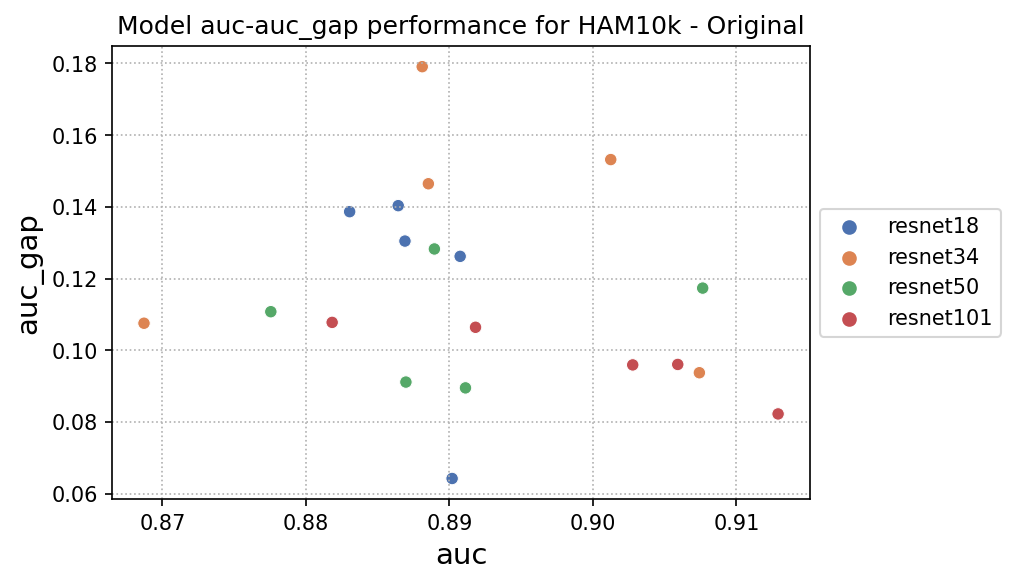

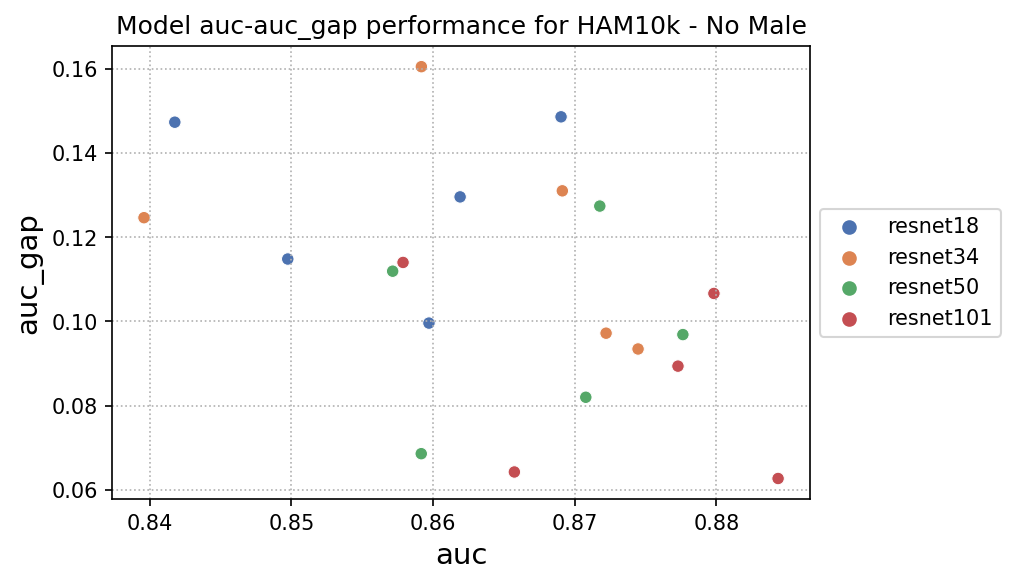

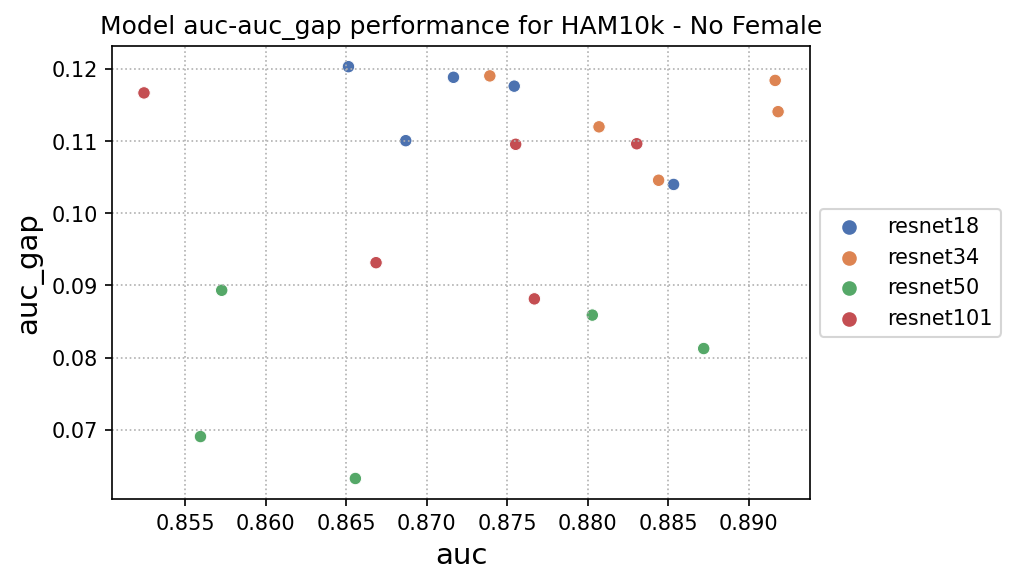

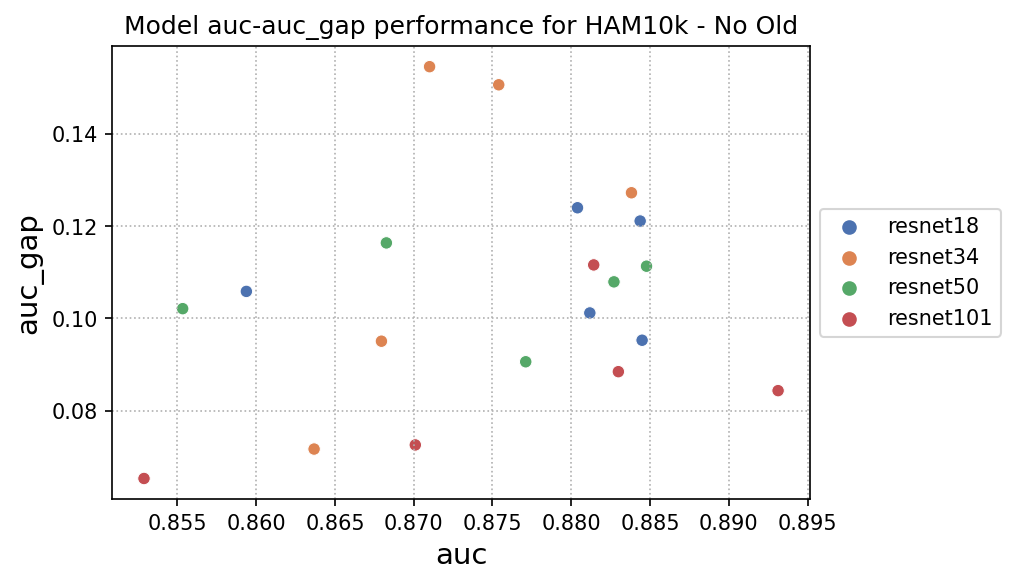

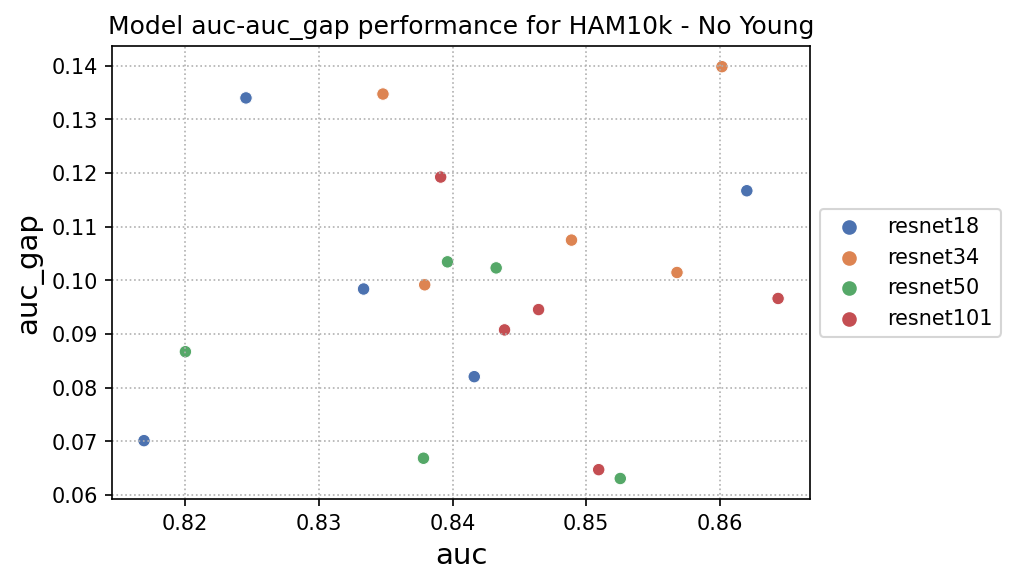

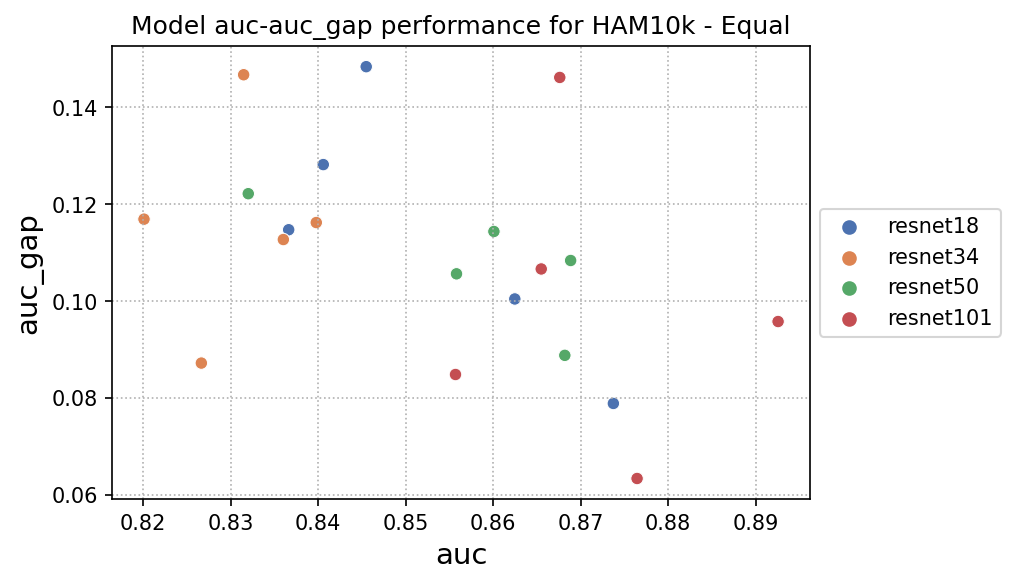

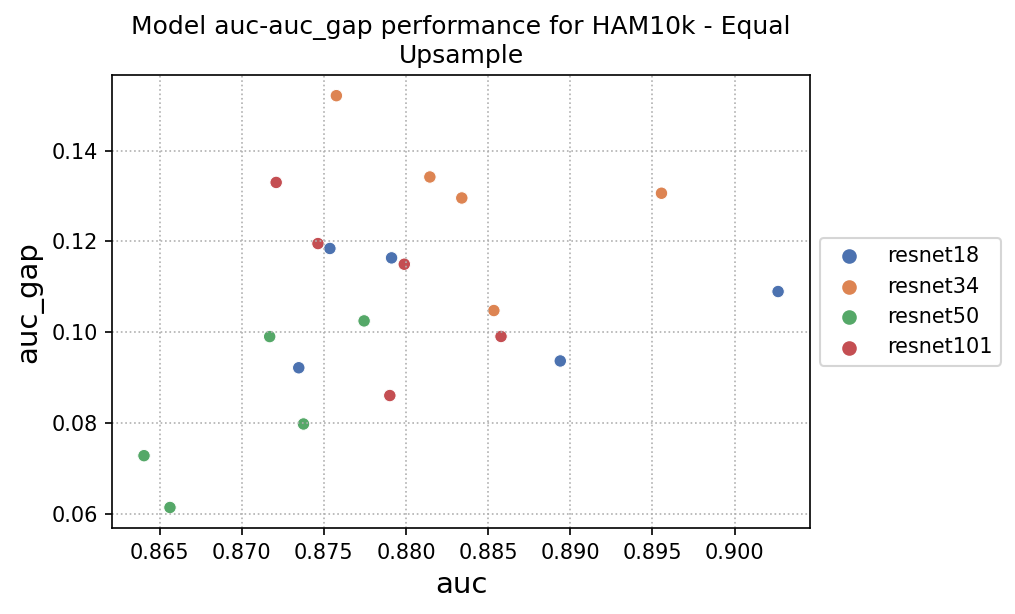

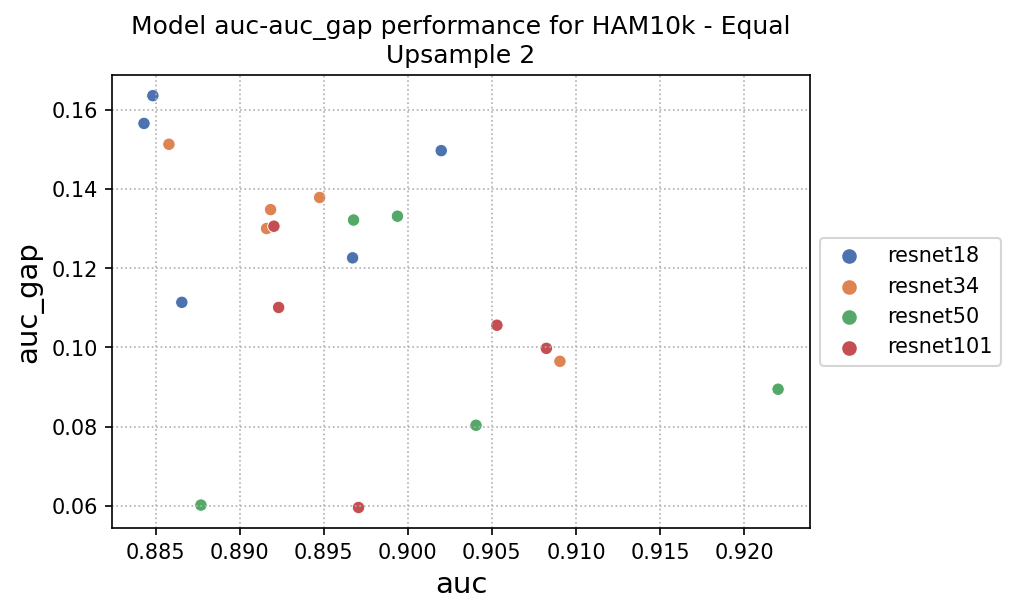

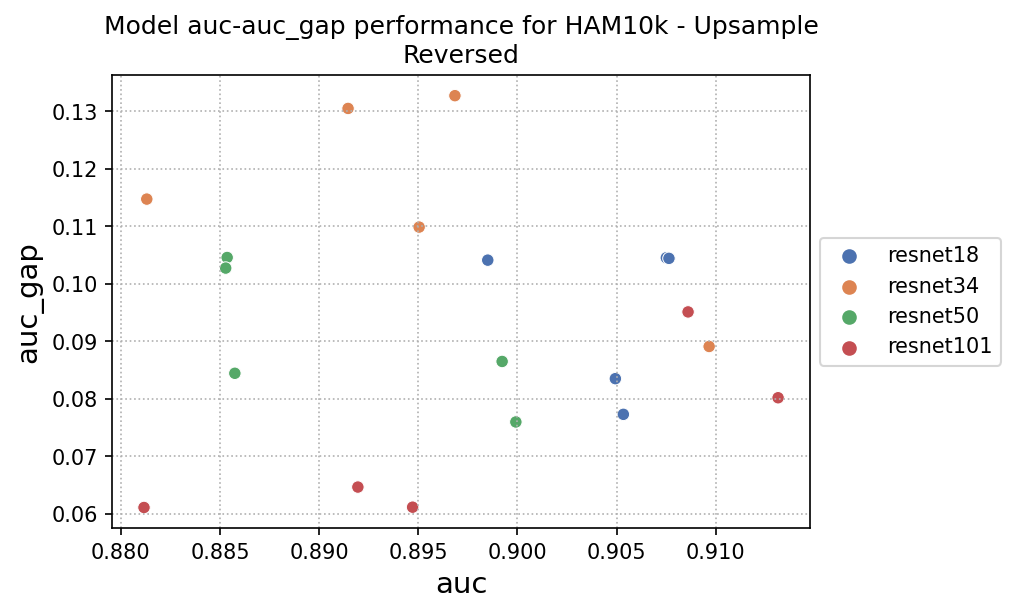

In [39]:
for df, df_name in dfs:
    plot_individual_model_performance(df, 'auc', 'auc_gap', 'Model auc-auc_gap performance for HAM10k - ' + df_name)

#### Individual Model Performance in comparison with normal HAM10k data models (AUC-AUC_Gap)

In [40]:
def two_data_model_performance(
    df_tuple,
    original_df,
    metric_1: str,
    metric_2: str,
    title: str = 'ResNet models performance per sampling technique for HAM10k'
):
    # print(df_tuple)
    df, df_name = df_tuple
    df['model_name'] = pd.Categorical(df['model_name'], ["resnet18", "resnet34", "resnet50", "resnet101"])
    df = df.sort_values("model_name")
    df = df[['model_name', metric_1, metric_2]]
    df['data'] = df_name

    original_df, original_df_name = original_df
    original_df['model_name'] = pd.Categorical(original_df['model_name'], ["resnet18", "resnet34", "resnet50", "resnet101"])
    original_df = original_df.sort_values("model_name")
    original_df = original_df[['model_name', metric_1, metric_2]]
    original_df['data'] = original_df_name

    # create a join dataframe with the original and the new results and 'metric_name', 'dataframe_name', metric_1, metric_2
    df = pd.concat([df, original_df])

    
    plt.rcParams['figure.dpi'] = 150
    ax = sns.scatterplot(data=df, x=metric_1, y=metric_2, hue="data", style='model_name', palette="deep", s=80)
    legend = plt.legend(
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        frameon=True,
        columnspacing=0.2,
    )

    ax.set_xlabel(metric_1, fontsize=14)
    ax.set_ylabel(metric_2, fontsize=14)
    ax.set_title(title, fontsize=14)

    ax.grid(linestyle='dotted')

    plt.show()

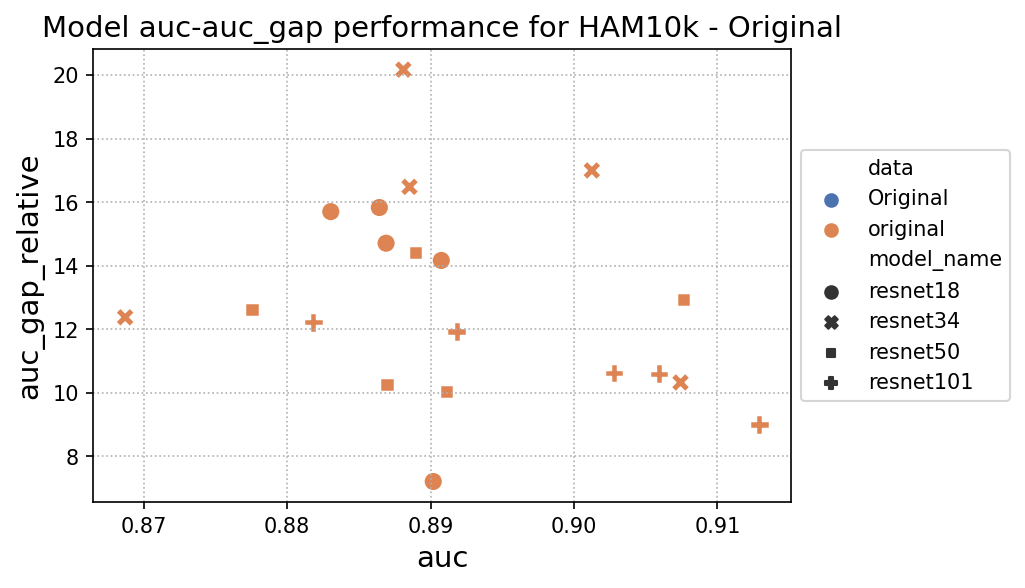

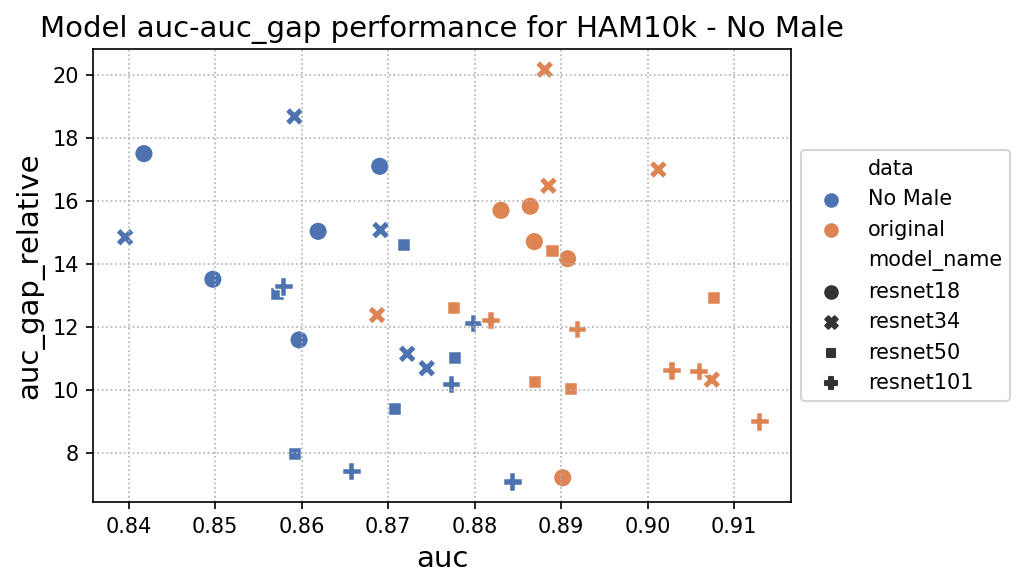

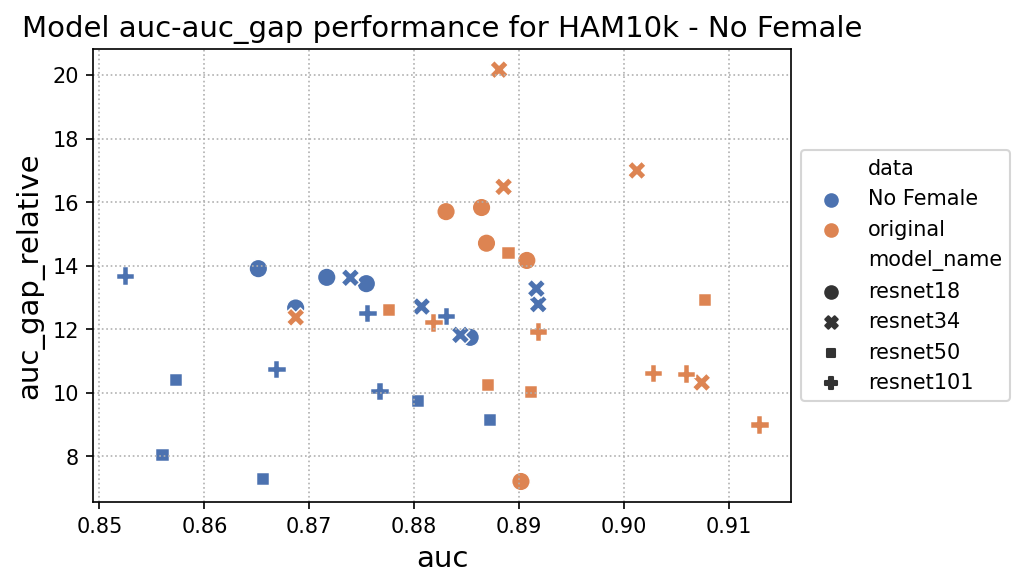

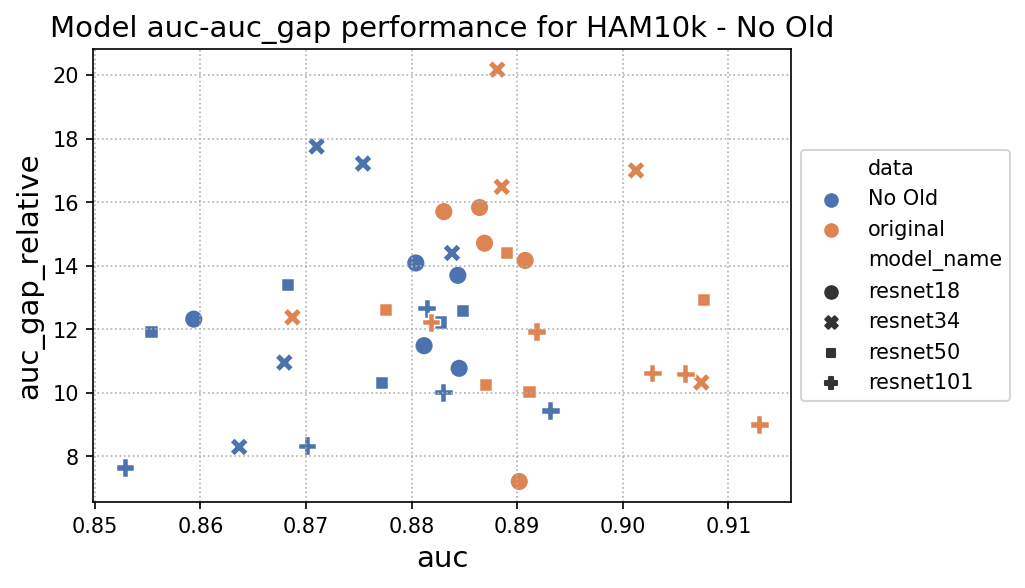

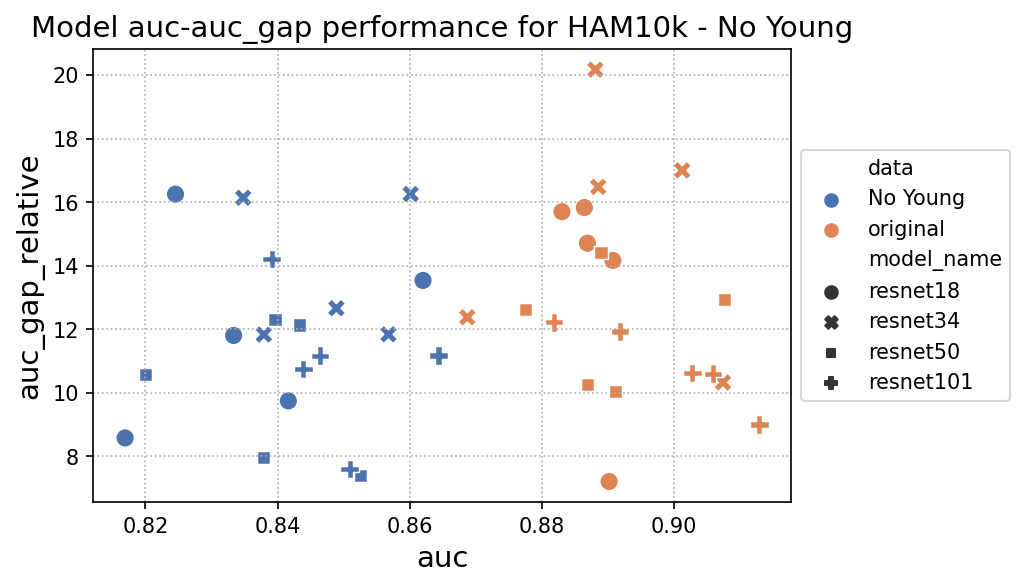

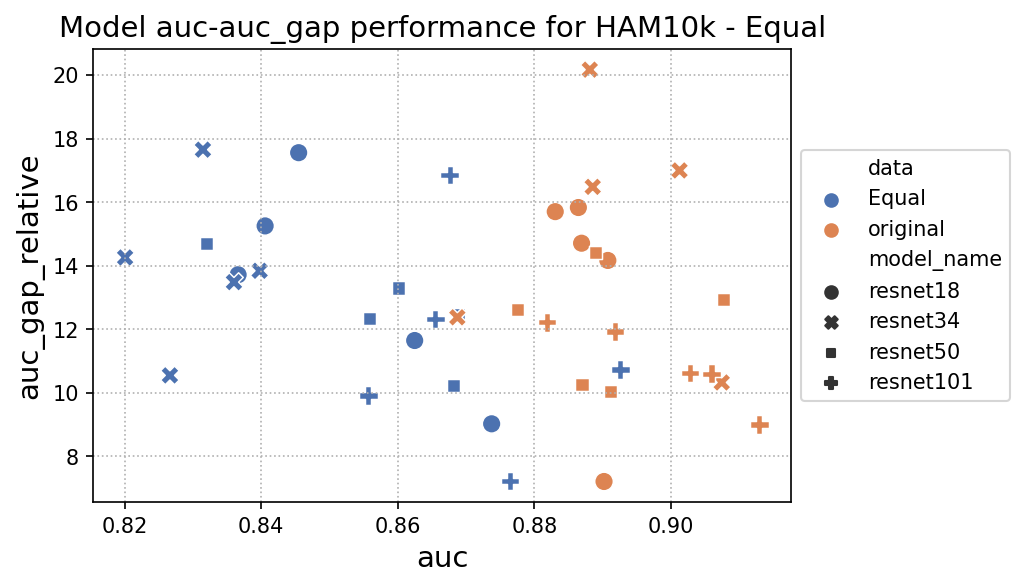

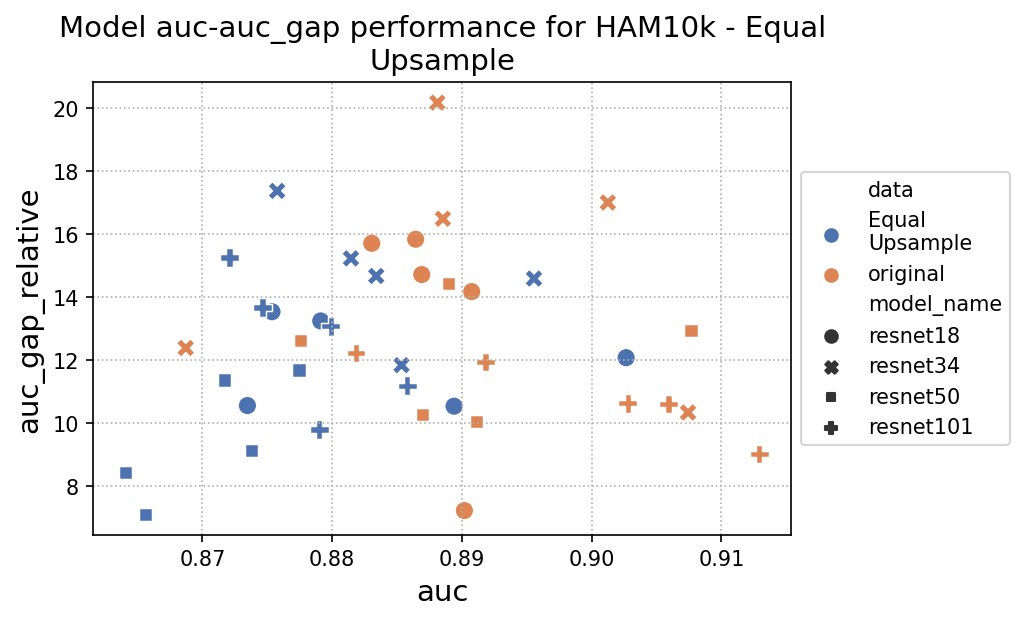

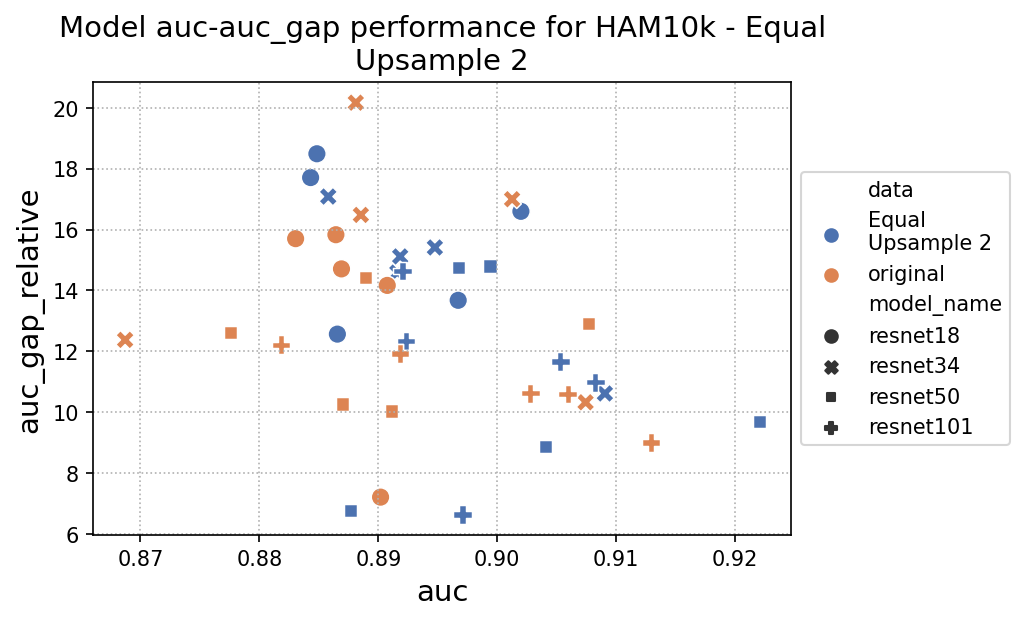

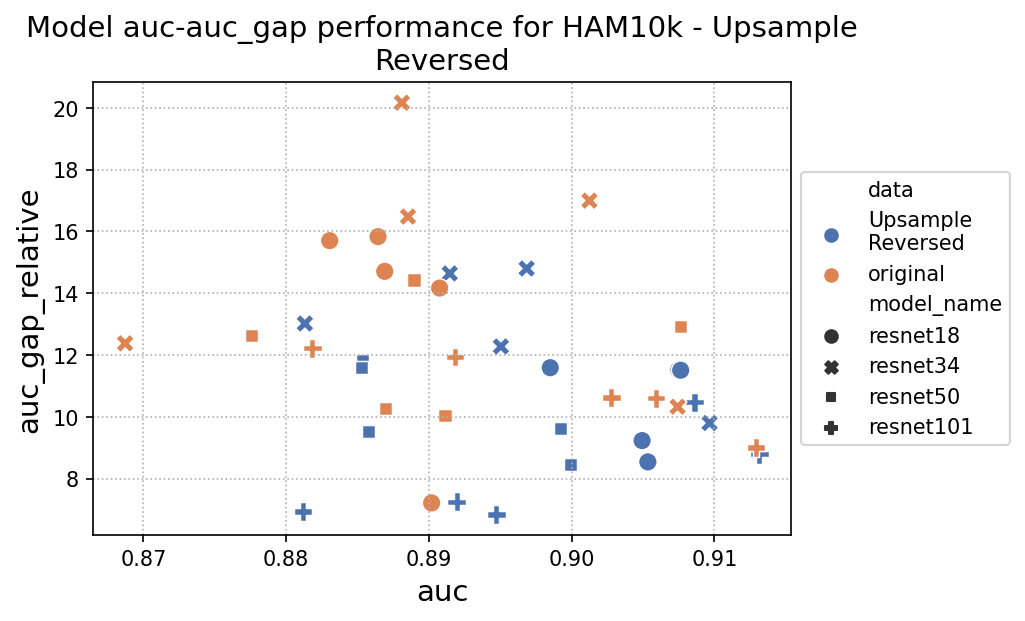

In [42]:
tmp_df = original_df[original_df['sampling_technique'] == 1]

for df, df_name in dfs:
    # two_data_model_performance((df, df_name), (tmp_df,'original'), 'auc', 'auc_gap', 'Model auc-auc_gap performance for HAM10k - ' + df_name)
    two_data_model_performance((df, df_name), (tmp_df,'original'), 'auc', 'auc_gap_relative', 'Model auc-auc_gap performance for HAM10k - ' + df_name)

#### Individual Model Performance across all datasets (AUC - AUC_gap)

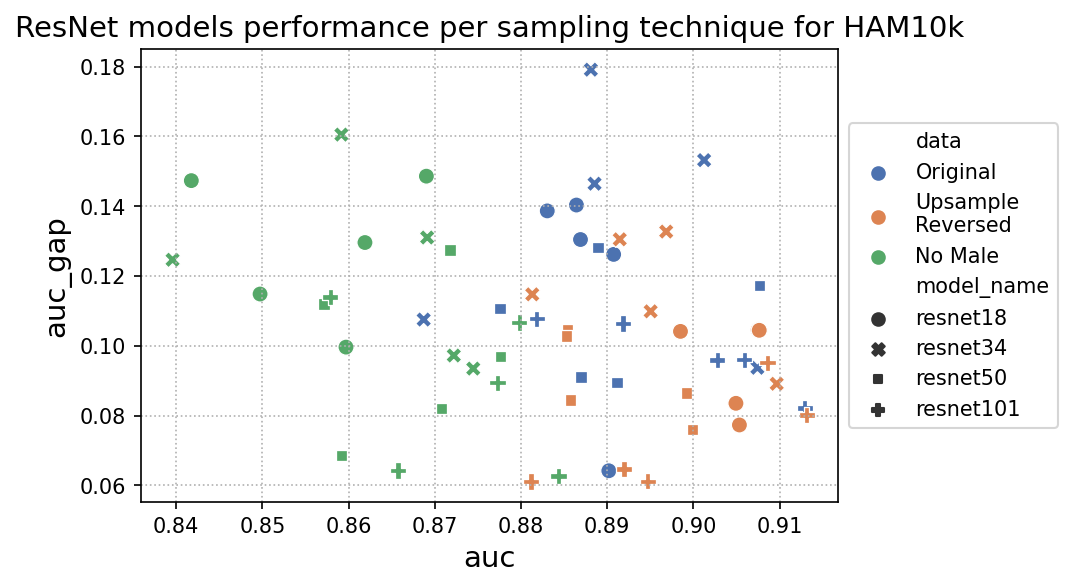

In [31]:
def all_models_scatter(
    df,s
    metric_1: str,
    metric_2: str,
    title: str = 'ResNet models performance per sampling technique for HAM10k'
):    

    plt.rcParams['figure.dpi'] = 150
    ax = sns.scatterplot(data=df, x=metric_1, y=metric_2, hue="data", palette="deep", s=60, style='model_name')
    legend = plt.legend(
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        frameon=True,
        columnspacing=0.2,
    )

    ax.set_xlabel(metric_1, fontsize=14)
    ax.set_ylabel(metric_2, fontsize=14)
    ax.set_title(title, fontsize=14)

    ax.grid(linestyle='dotted')

    plt.show()


df_tuples = dfs
dfs_data = []

for tuple in [(original_df, 'Original'), (upsample_df, 'Upsample\nReversed'), (no_male_df, 'No Male')]:
    df, df_name = tuple
    df['model_name'] = pd.Categorical(df['model_name'], ["resnet18", "resnet34", "resnet50", "resnet101"])
    df = df.sort_values("model_name")
    df['data'] = df_name
    dfs_data.append(df)

# CREATE A JOINTS DATAFRAME
df = pd.concat(dfs_data)
all_models_scatter(df, 'auc', 'auc_gap')

In [19]:
def all_models_performance(
    df_tuples,
    metric_1: str,
    metric_2: str,
    title: str = 'ResNet models performance per sampling technique for HAM10k'
):
    dfs = []
    for tuple in df_tuples:
        df, df_name = tuple
        df['model_name'] = pd.Categorical(df['model_name'], ["resnet18", "resnet34", "resnet50", "resnet101"])
        df = df.sort_values("model_name")
        df = df[['model_name', metric_1, metric_2]]
        df['data'] = df_name
        dfs.append(df)

    # create a join dataframe with the original and the new results and 'metric_name', 'dataframe_name', metric_1, metric_2
    df = pd.concat(dfs)
    
    plt.rcParams['figure.dpi'] = 300
    ax = sns.scatterplot(data=df, x=metric_1, y=metric_2, hue="data", palette="deep", s=30)
    legend = plt.legend(
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        frameon=True,
        columnspacing=0.2,
    )

    ax.set_xlabel(metric_1, fontsize=14)
    ax.set_ylabel(metric_2, fontsize=14)
    ax.set_title(title, fontsize=14)

    ax.grid(linestyle='dotted')

    plt.show()

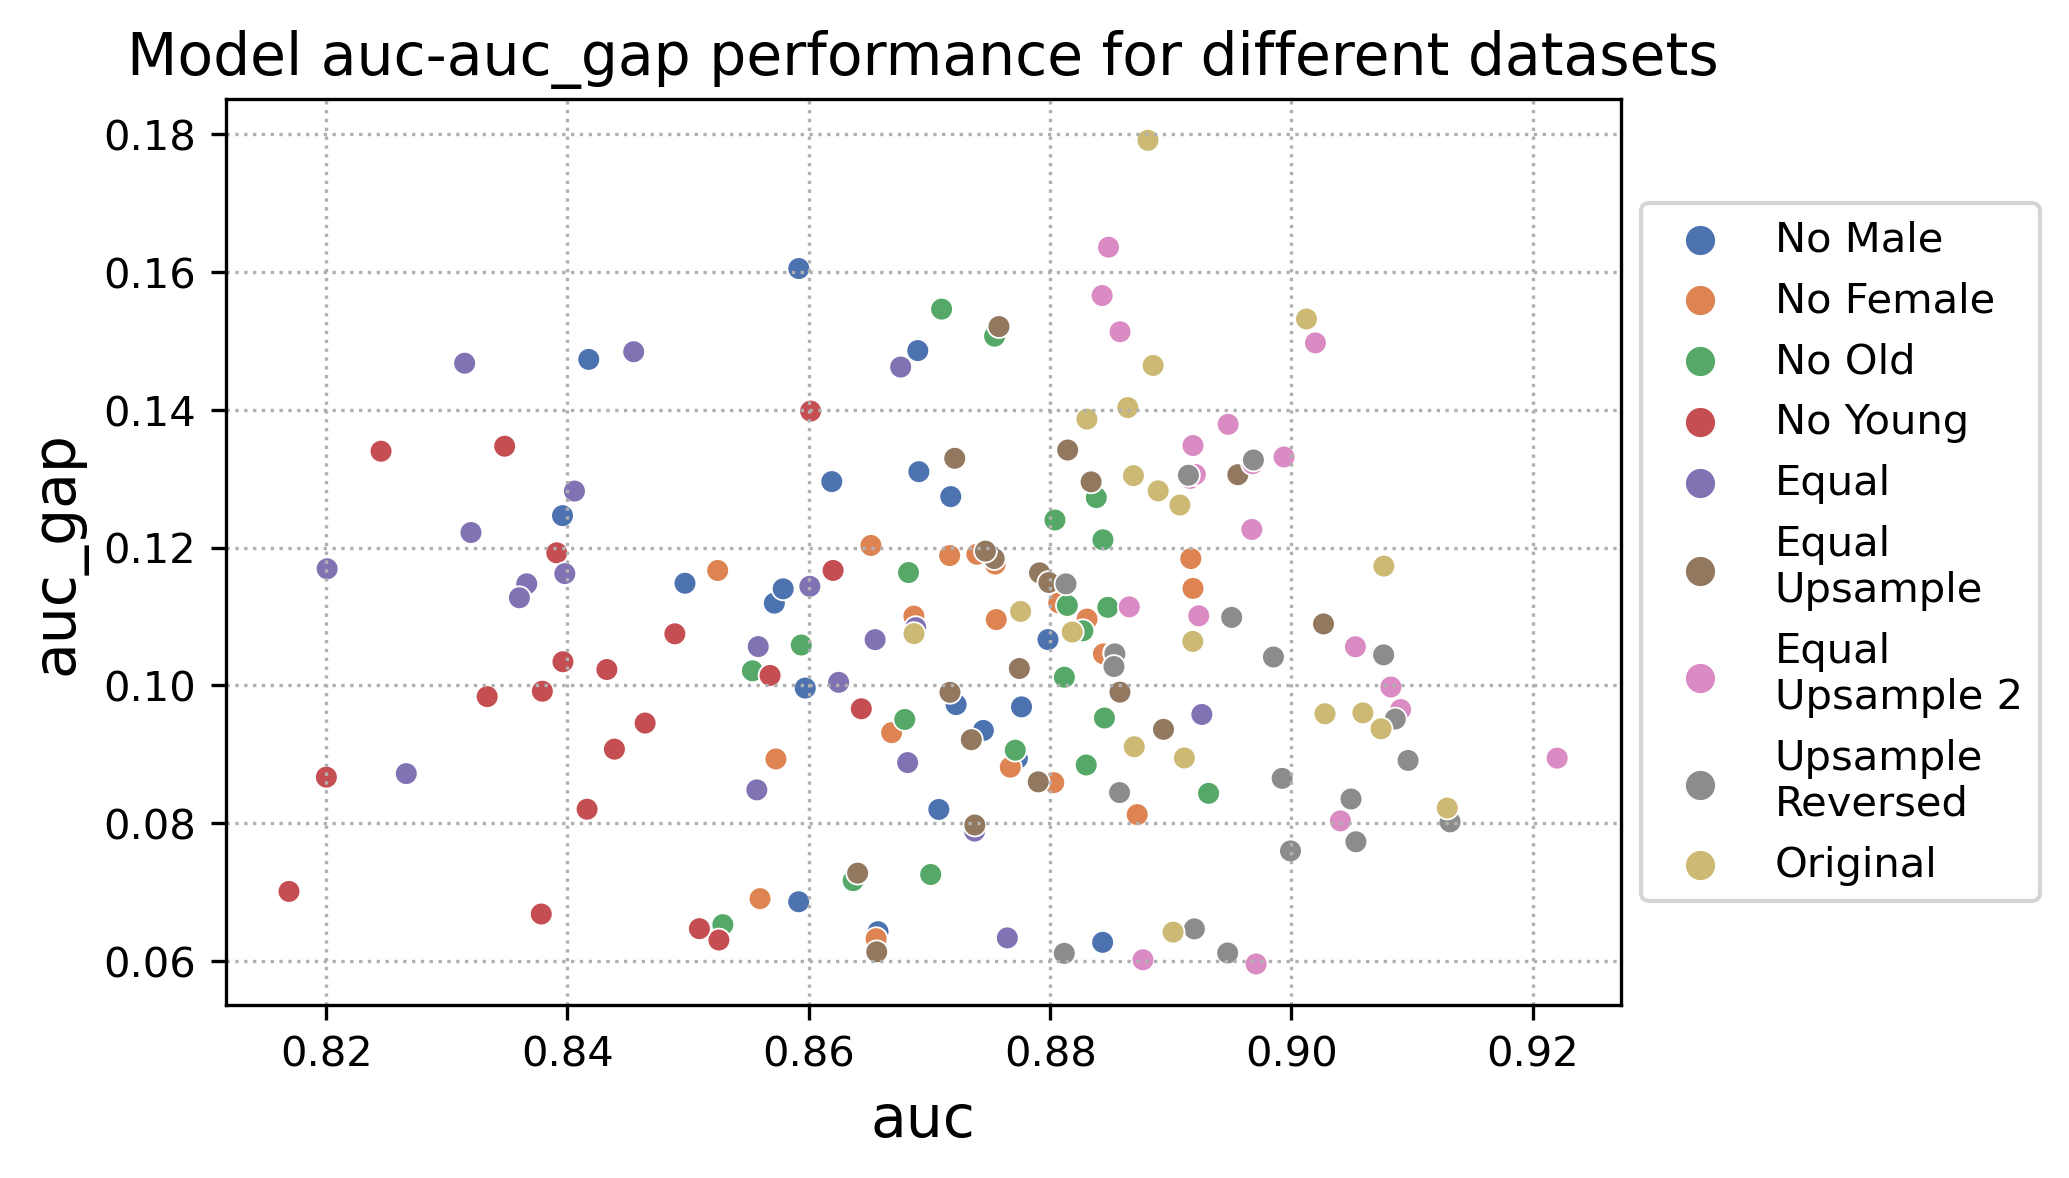

In [20]:
tmp_df = original_df[original_df['sampling_technique'] == 1]
# tmp_df = tmp_df[tmp_df['seed'].isin([42, 43, 44])]

df_tuple_list = dfs.copy()
# df_tuple_list.append((tmp_df,'original'))

all_models_performance(df_tuple_list, 'auc', 'auc_gap', 'Model auc-auc_gap performance for different datasets')

#### Box Plot for all datasets

In [17]:
def all_data_box_plot(
    df_tuples,
    metric: str,
    title: str = 'ResNet models performance per sampling technique for HAM10k'
):
    
    plt.figure(figsize=(10, 5))
    dfs = []
    for tuple in df_tuples:
        df, df_name = tuple
        df['model_name'] = pd.Categorical(df['model_name'], ["resnet18", "resnet34", "resnet50", "resnet101"])
        df = df.sort_values("model_name")

        # DIFFERENT AUC_GAP
        # df['auc_gap_2'] = np.maximum(df['age_auc_group_0'] - df['age_auc_group_1'], df['sex_auc_group_0'] - df['sex_auc_group_1'])
        # df = df[['model_name' ,metric, 'auc_gap_2']]


        df = df[['model_name' ,metric]]
        df['data'] = df_name
        dfs.append(df)

    # create a join dataframe with the original and the new results and 'metric_name', 'dataframe_name', metric_1, metric_2
    df = pd.concat(dfs)


    sns.boxplot(y=metric, x="data", data=df, palette="deep", showmeans=True)
    # sns.boxplot(y='auc_gap_2', x="data", dasta=df, palette="deep", showmeans=True)

    plt.ylabel(metric)
    plt.xlabel('Data Name')

    plt.show()

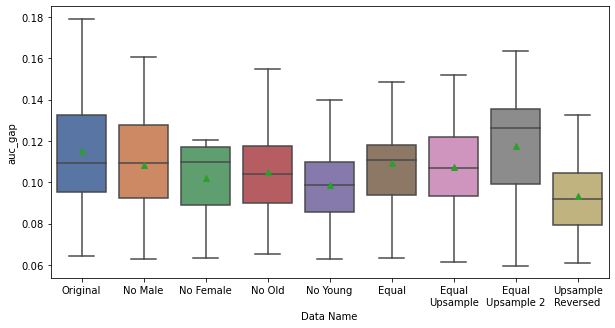

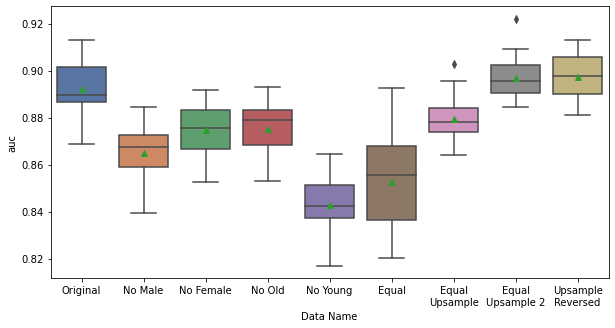

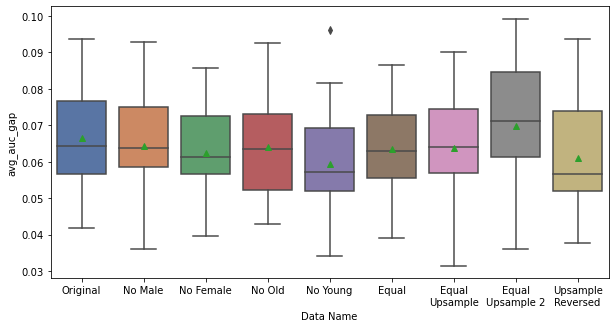

In [18]:
all_data_box_plot(dfs, 'auc_gap', 'BoxPlot of AUC Gap for different datasets')
all_data_box_plot(dfs, 'auc', 'BoxPlot of AUC for different datasets')
all_data_box_plot(dfs, 'avg_auc_gap', 'BoxPlot of AUC for different datasets')

## Lagrange Optimization Fairness
- for finding fair students/teachers
- for potentially controlling the level of fairness

### Read Data

In [15]:
results_path = '../../results/ham10000/fair_loss/'

test_data = []

for folder in os.scandir(results_path):
    if folder.is_dir():
        # Perform operations on the folder
        file_path = results_path + folder.name
        if os.path.exists(file_path + '/test.csv'):
            df_tmp = pd.read_csv(file_path + '/test.csv')
            test_data.append(df_tmp)

    
fair_loss_df = pd.concat(test_data) 

fair_loss_df = fair_loss_df[fair_loss_df['fairness_loss'] == 1]

### Analysis

In [16]:
fairness_loss_names = {
    1: 'Equal Loss',
    2: 'Equalized Odds',
    3: 'Equal AUC',
}

#### HEATMAP of different epsilon - lagrange combinations

In [17]:
def plot_lagrange_heatmap(
    df: pd.DataFrame,
    title: str = 'Lagrange Multiplier Heatmap',
    metric: str = 'auc'
):
    
    # Average over the seeds
    # df = df[df['auc'] > 0.85]
    df = df.groupby(['model_name', 'fairness_loss', 'epsilon', 'lagrange'])[metric].mean().reset_index()

    df_pivot = df.pivot(index='epsilon', columns='lagrange', values=metric)

    plt.rcParams['figure.dpi'] = 150
    plt.figure(figsize=(7, 4))
    sns.heatmap(df_pivot, annot=True, fmt=".3f")
    plt.title(title)
    plt.show()

In [23]:
def plot_lagrange_comapred_to_original_model_performance(
    df: pd.DataFrame,
    original_df: pd.DataFrame,
    metric_1: str,
    metric_2: str,
    title: str = '',
    diff_data_df: pd.DataFrame = None,
    diff_data_name: str = '',
):
    # Filter df
    # df = df[df['auc'] > 0.8]
    # df = df[df['epsilon'].isin([0.1, 0.05])]
    # df = df[df['lagrange'].isin([0.5, 1.0, 5.0])]

    df = df[['fairness_loss', 'model_name', metric_1, metric_2]]
    df['model_name'] = pd.Categorical(df['model_name'], ["resnet18", "resnet34", "resnet50", "resnet101"])
    df = df.sort_values("model_name")
    df['fairness_loss'] = df['fairness_loss'].replace(fairness_loss_names)

    original_df = original_df[original_df['sampling_technique'] == 1]
    original_df['model_name'] = pd.Categorical(original_df['model_name'], ["resnet18", "resnet34", "resnet50", "resnet101"])
    original_df = original_df.sort_values("model_name")
    original_df = original_df[['model_name', metric_1, metric_2]]
    original_df['fairness_loss'] = 'original'

    if diff_data_df is not None:
        diff_data_df = diff_data_df[['model_name', metric_1, metric_2]]
        diff_data_df['fairness_loss'] = diff_data_name
        df = pd.concat([df, original_df, diff_data_df])
    else:
        df = pd.concat([df, original_df])


    #FILTER ONLY RESNET50s
    # df = df[df['model_name'].isin(['resnet50', 'resnet101'])]

    plt.rcParams['figure.dpi'] = 150
    ax = sns.scatterplot(data=df, x=metric_1, y=metric_2, hue="fairness_loss", palette="deep", style='model_name')
    legend = plt.legend(
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        frameon=True,
        columnspacing=0.2,
    )

    ax.set_xlabel(metric_1, fontsize=14)
    ax.set_ylabel(metric_2, fontsize=14)
    ax.set_title(title, fontsize=14)

    ax.grid(linestyle='dotted')

    plt.show()

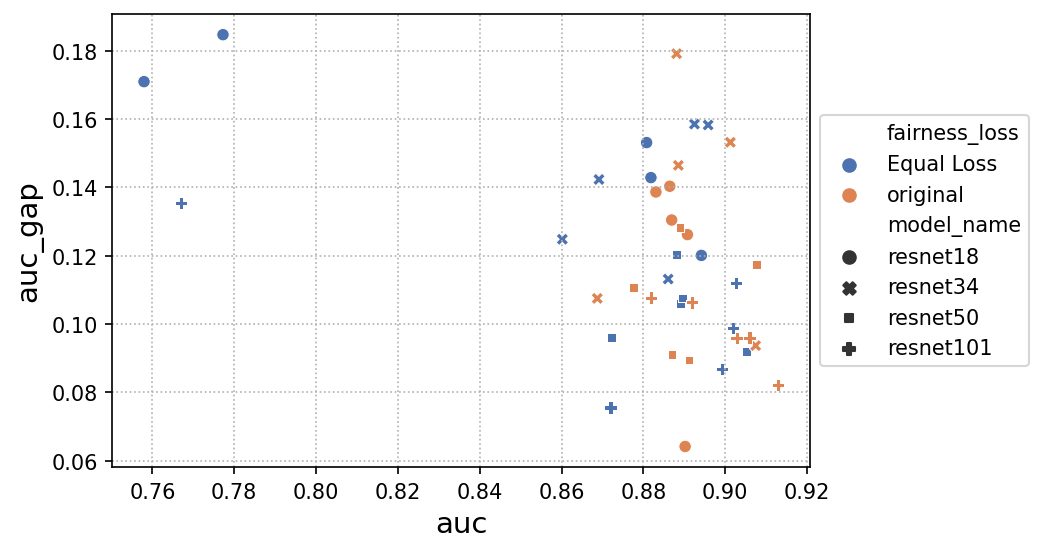

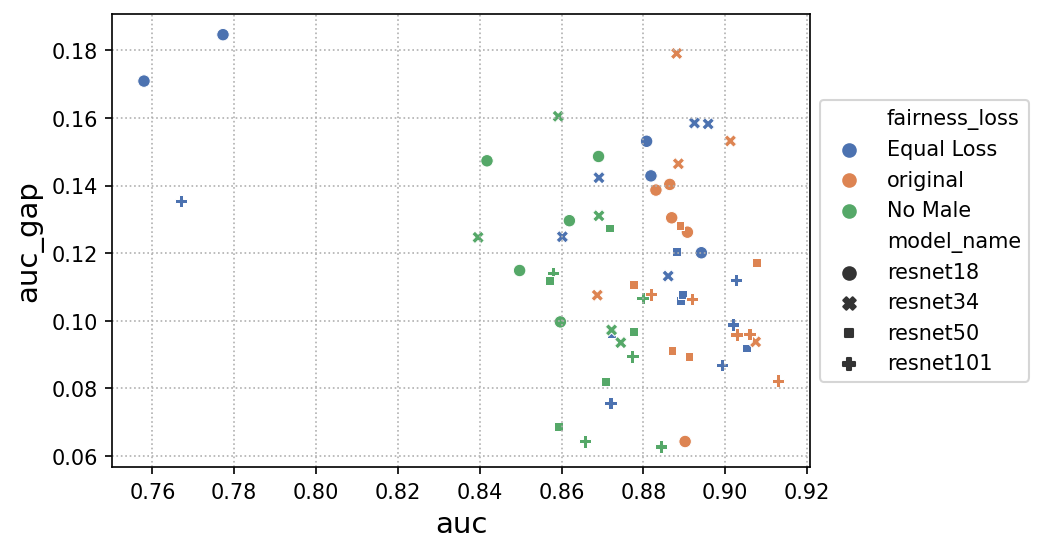

In [26]:
plot_lagrange_comapred_to_original_model_performance(
    fair_loss_df,
    original_df,
    'auc',
    'auc_gap',
)

# display(no_male_df.head())

plot_lagrange_comapred_to_original_model_performance(
    fair_loss_df,
    original_df,
    'auc',
    'auc_gap',
    diff_data_name='No Male',
    diff_data_df=no_male_df,
) 

### Data Skewing with Lagrange Models and Original Data Comparison

In [90]:
def all_data_box_plot(
    df_tuples,
    metric: str,
    title: str = 'ResNet models performance per sampling technique for HAM10k',
    baseline: Optional[float] = None,
    mode: Optional[Literal['all', 'student', 'teacher']] = 'all',
):
    
    plt.figure(figsize=(12, 5))
    dfs = []
    for tuple in df_tuples:
        df, df_name = tuple
        df['model_name'] = pd.Categorical(df['model_name'], ["resnet18", "resnet34", "resnet50", "resnet101"])
        df = df.sort_values("model_name")

        if mode == 'student':
            df = df[df['model_name'].isin(['resnet18', 'resnet34'])]
        
        if mode == 'teacher':
            df = df[df['model_name'].isin(['resnet50', 'resnet101'])]

        if df_name == 'Original':
            baseline = df[metric].median()

        df = df[['model_name' , metric]]
        df['data'] = df_name
        dfs.append(df)

        if df_name in ['Original', 'Lagrange', 'Equal\nData', 'Equal\nUpsample', 'Subgroup\nReversed']:
            df['technique'] = 'Fair'
        else:
            df['technique'] = 'Unfair'

        # Give Fair Techniques and Unfair Technique

    # create a join dataframe with the original and the new results and 'metric_name', 'dataframe_name', metric_1, metric_2
    df = pd.concat(dfs)

    sns.boxplot(
        y=metric, 
        x="data",
        data=df, 
        palette="deep", 
        showmeans=True,
        linewidth=1.5, 
        boxprops=dict(linewidth=0.5), 
        showfliers=False,
        width=0.5, 
        dodge=False,
        hue='technique',
        # zorder=10,
    )

    ax=plt.gca()
    ax.set_facecolor('#F0F0F0')

    plt.xticks(fontsize=12)

    for ytick in ax.get_yticks():
        ax.axhline(y=ytick, linestyle='dotted', linewidth=0.8, color='white', alpha=1, zorder=0)


    # ax.yaxis.grid(True, linestyle='dotted', linewidth=0.8, color='white', alpha=1)
    # ax.grid(axis='y', linestyle='dotted', linewidth=0.8, color='white', alpha=1, zorder=0) 

    plt.legend(loc='upper left', frameon=True)

    plt.axhline(y=baseline, color='r', linestyle='--')

    plt.xlabel('', fontsize=15)
    if metric == 'auc':
        plt.ylabel('AUC', fontsize=15)
    if metric == 'avg_auc_gap_relative':
        plt.ylabel('Avg relative AUC Gap', fontsize=15)
    plt.title(title, fontsize=15)

    plt.show()

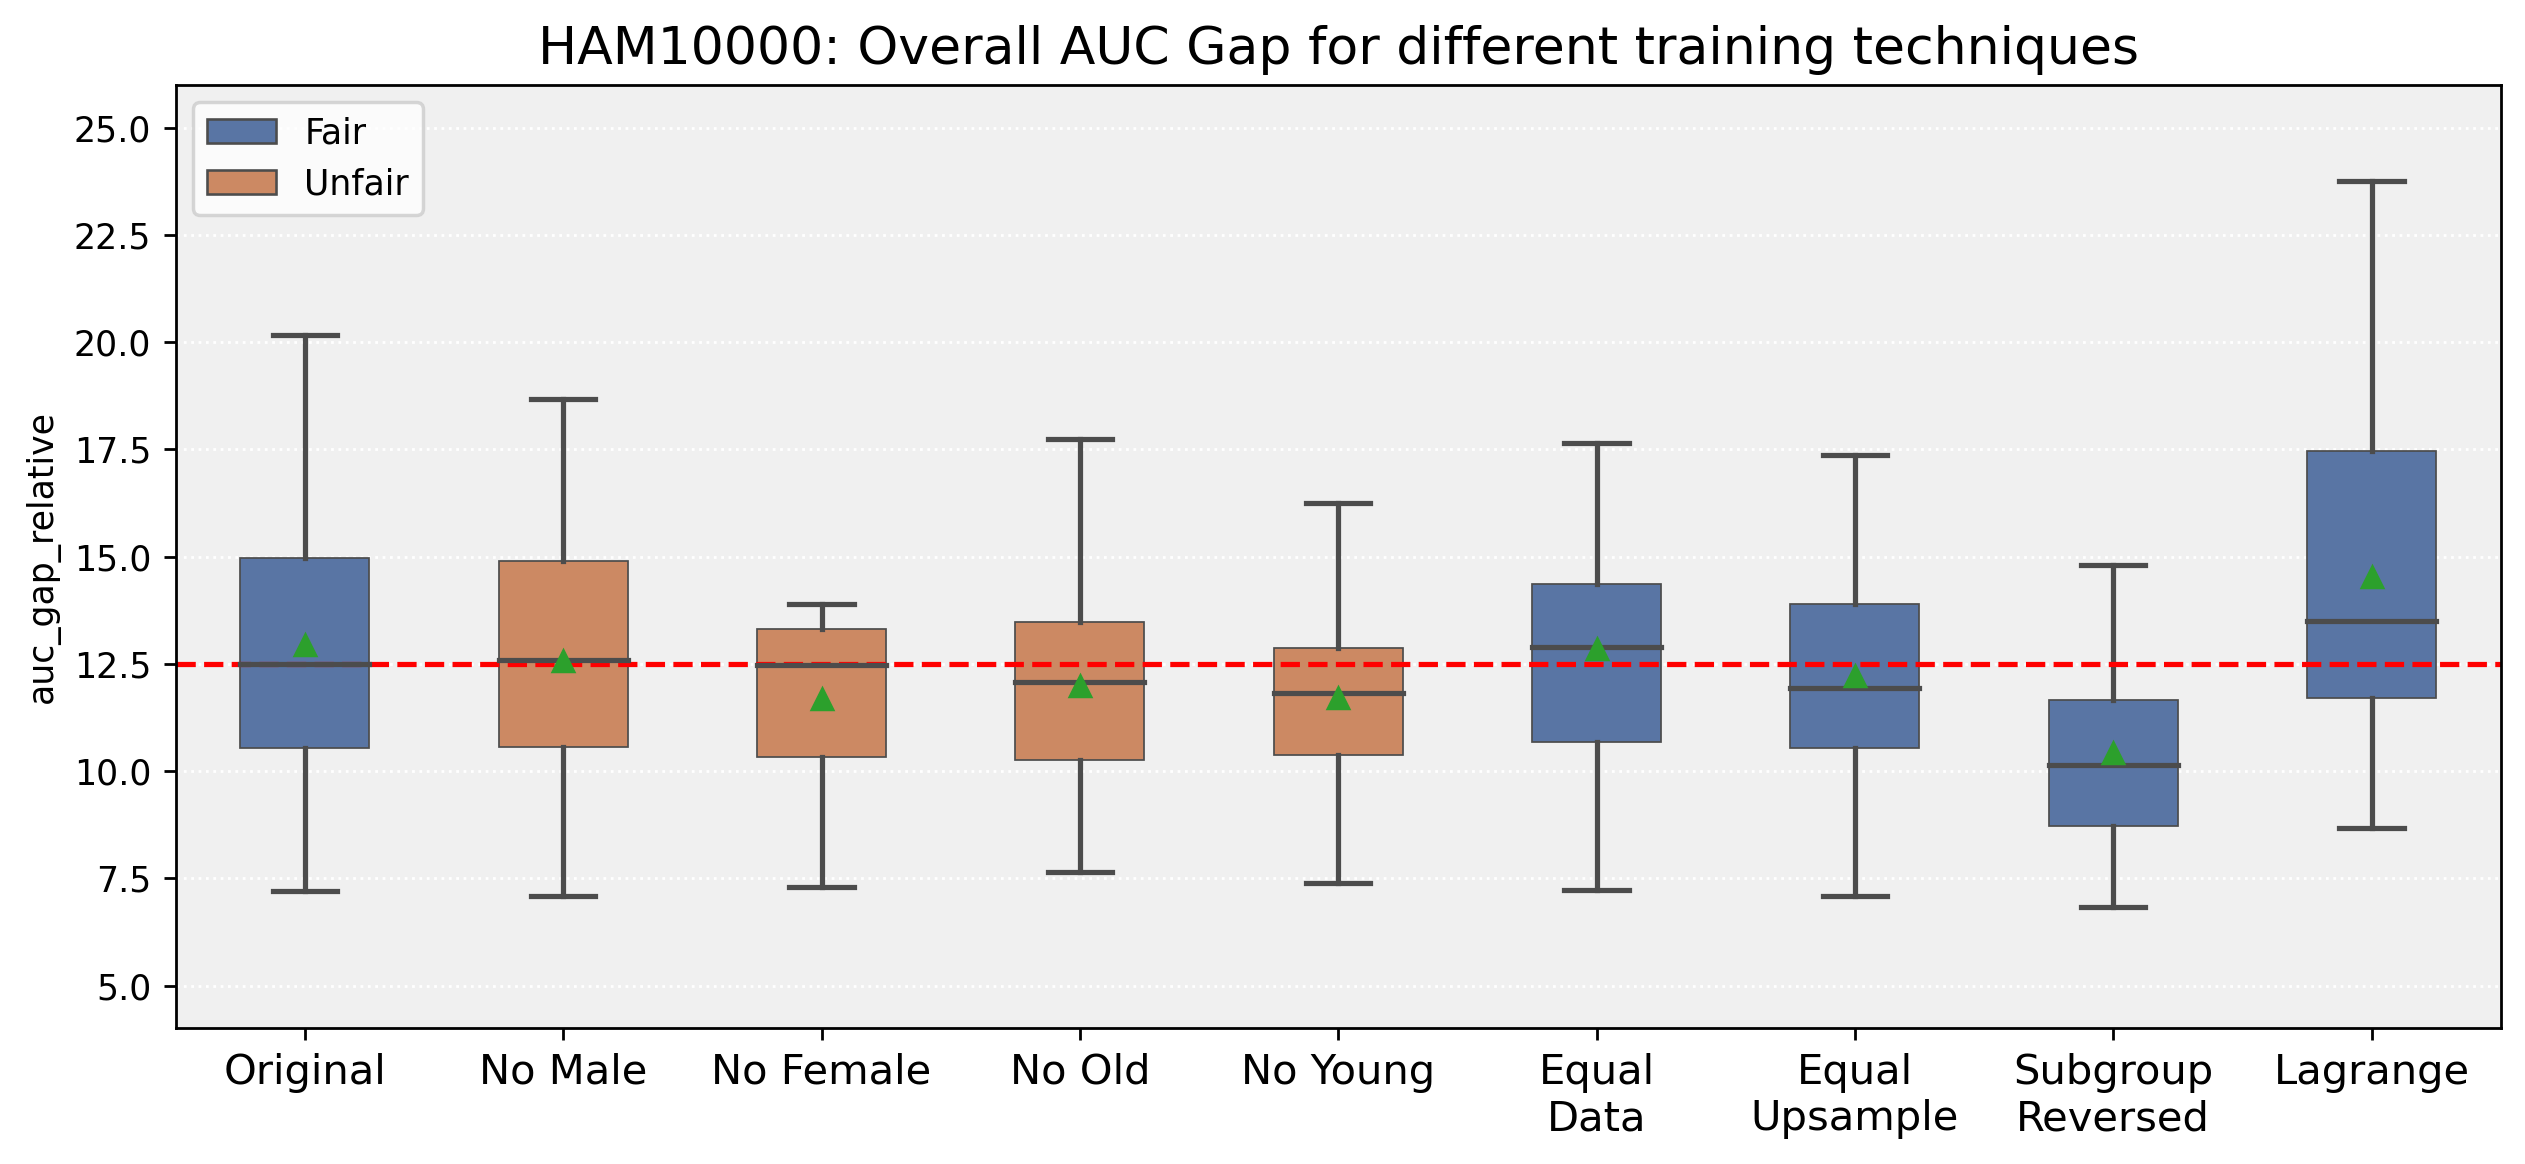

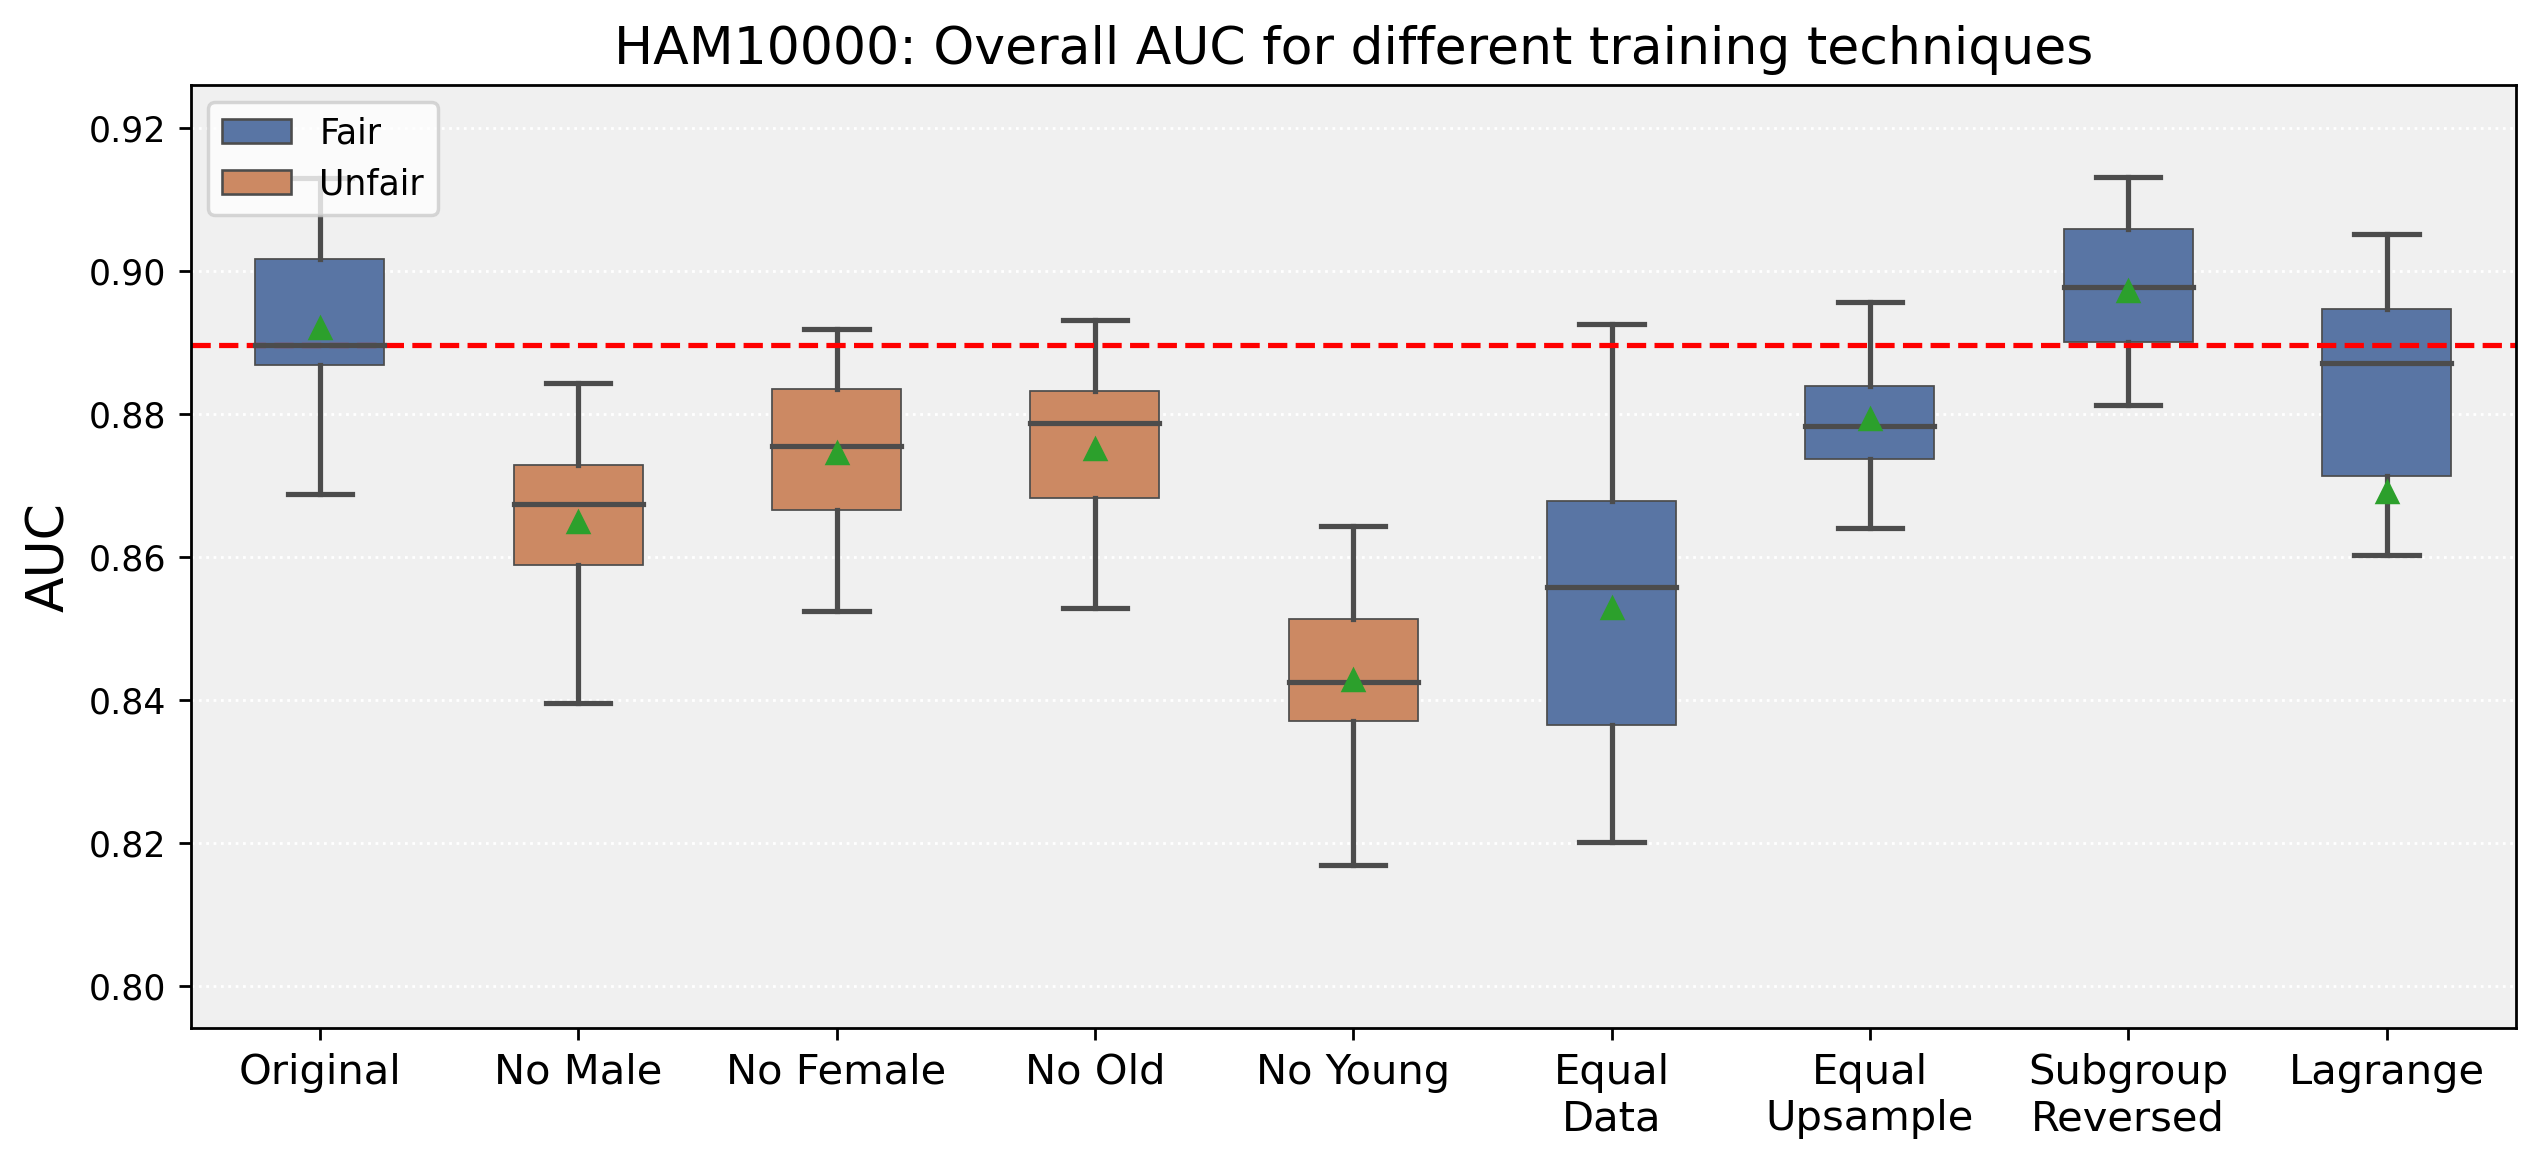

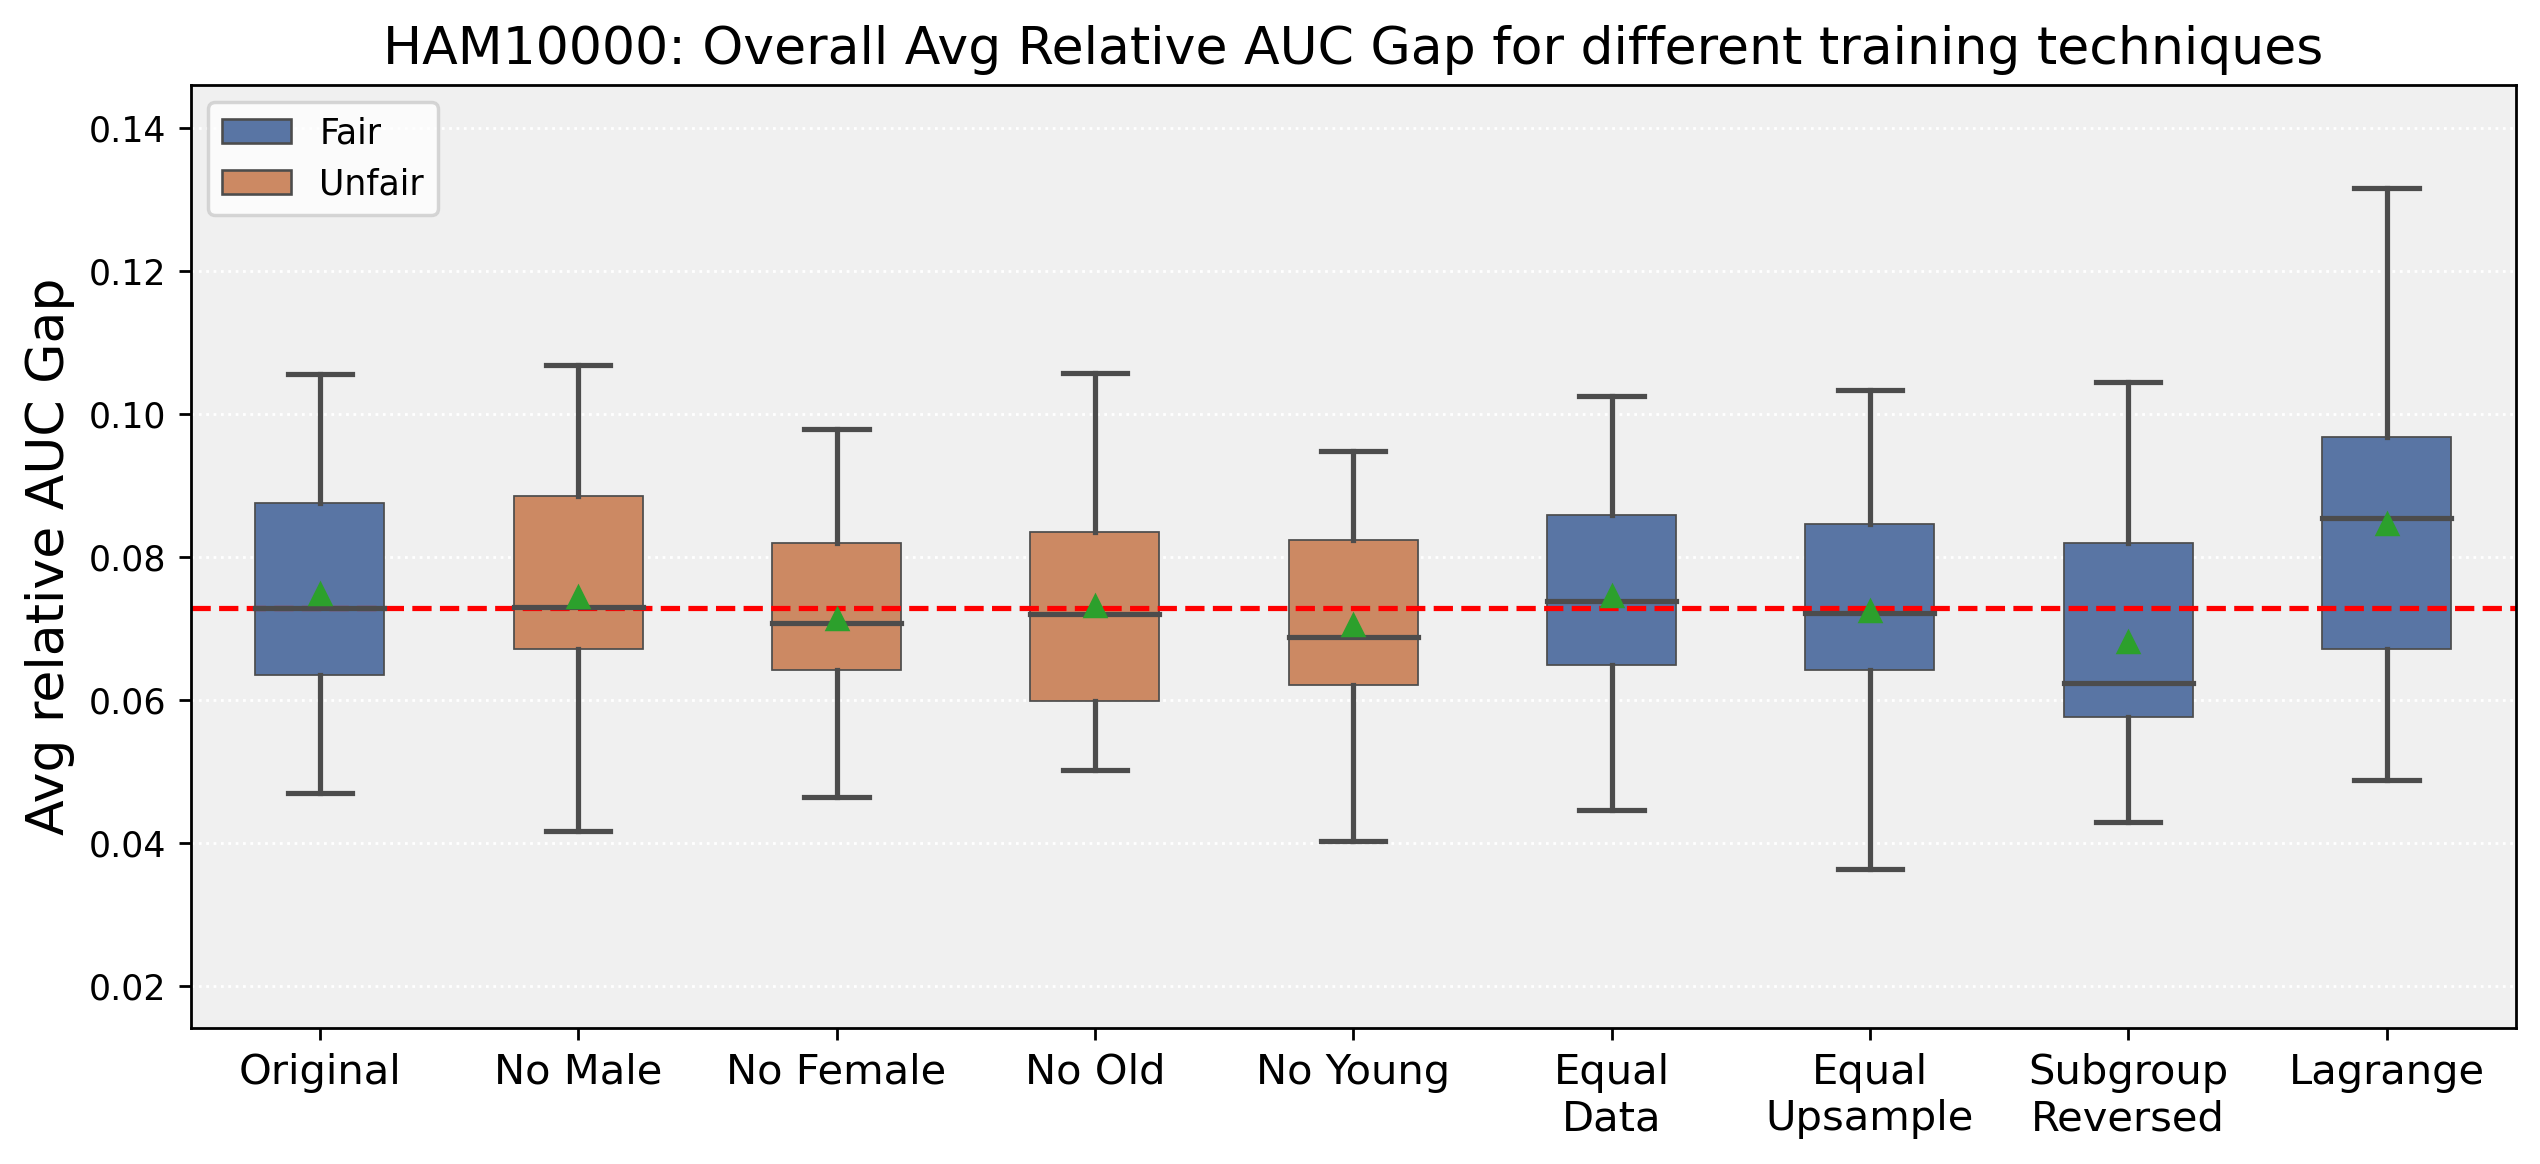

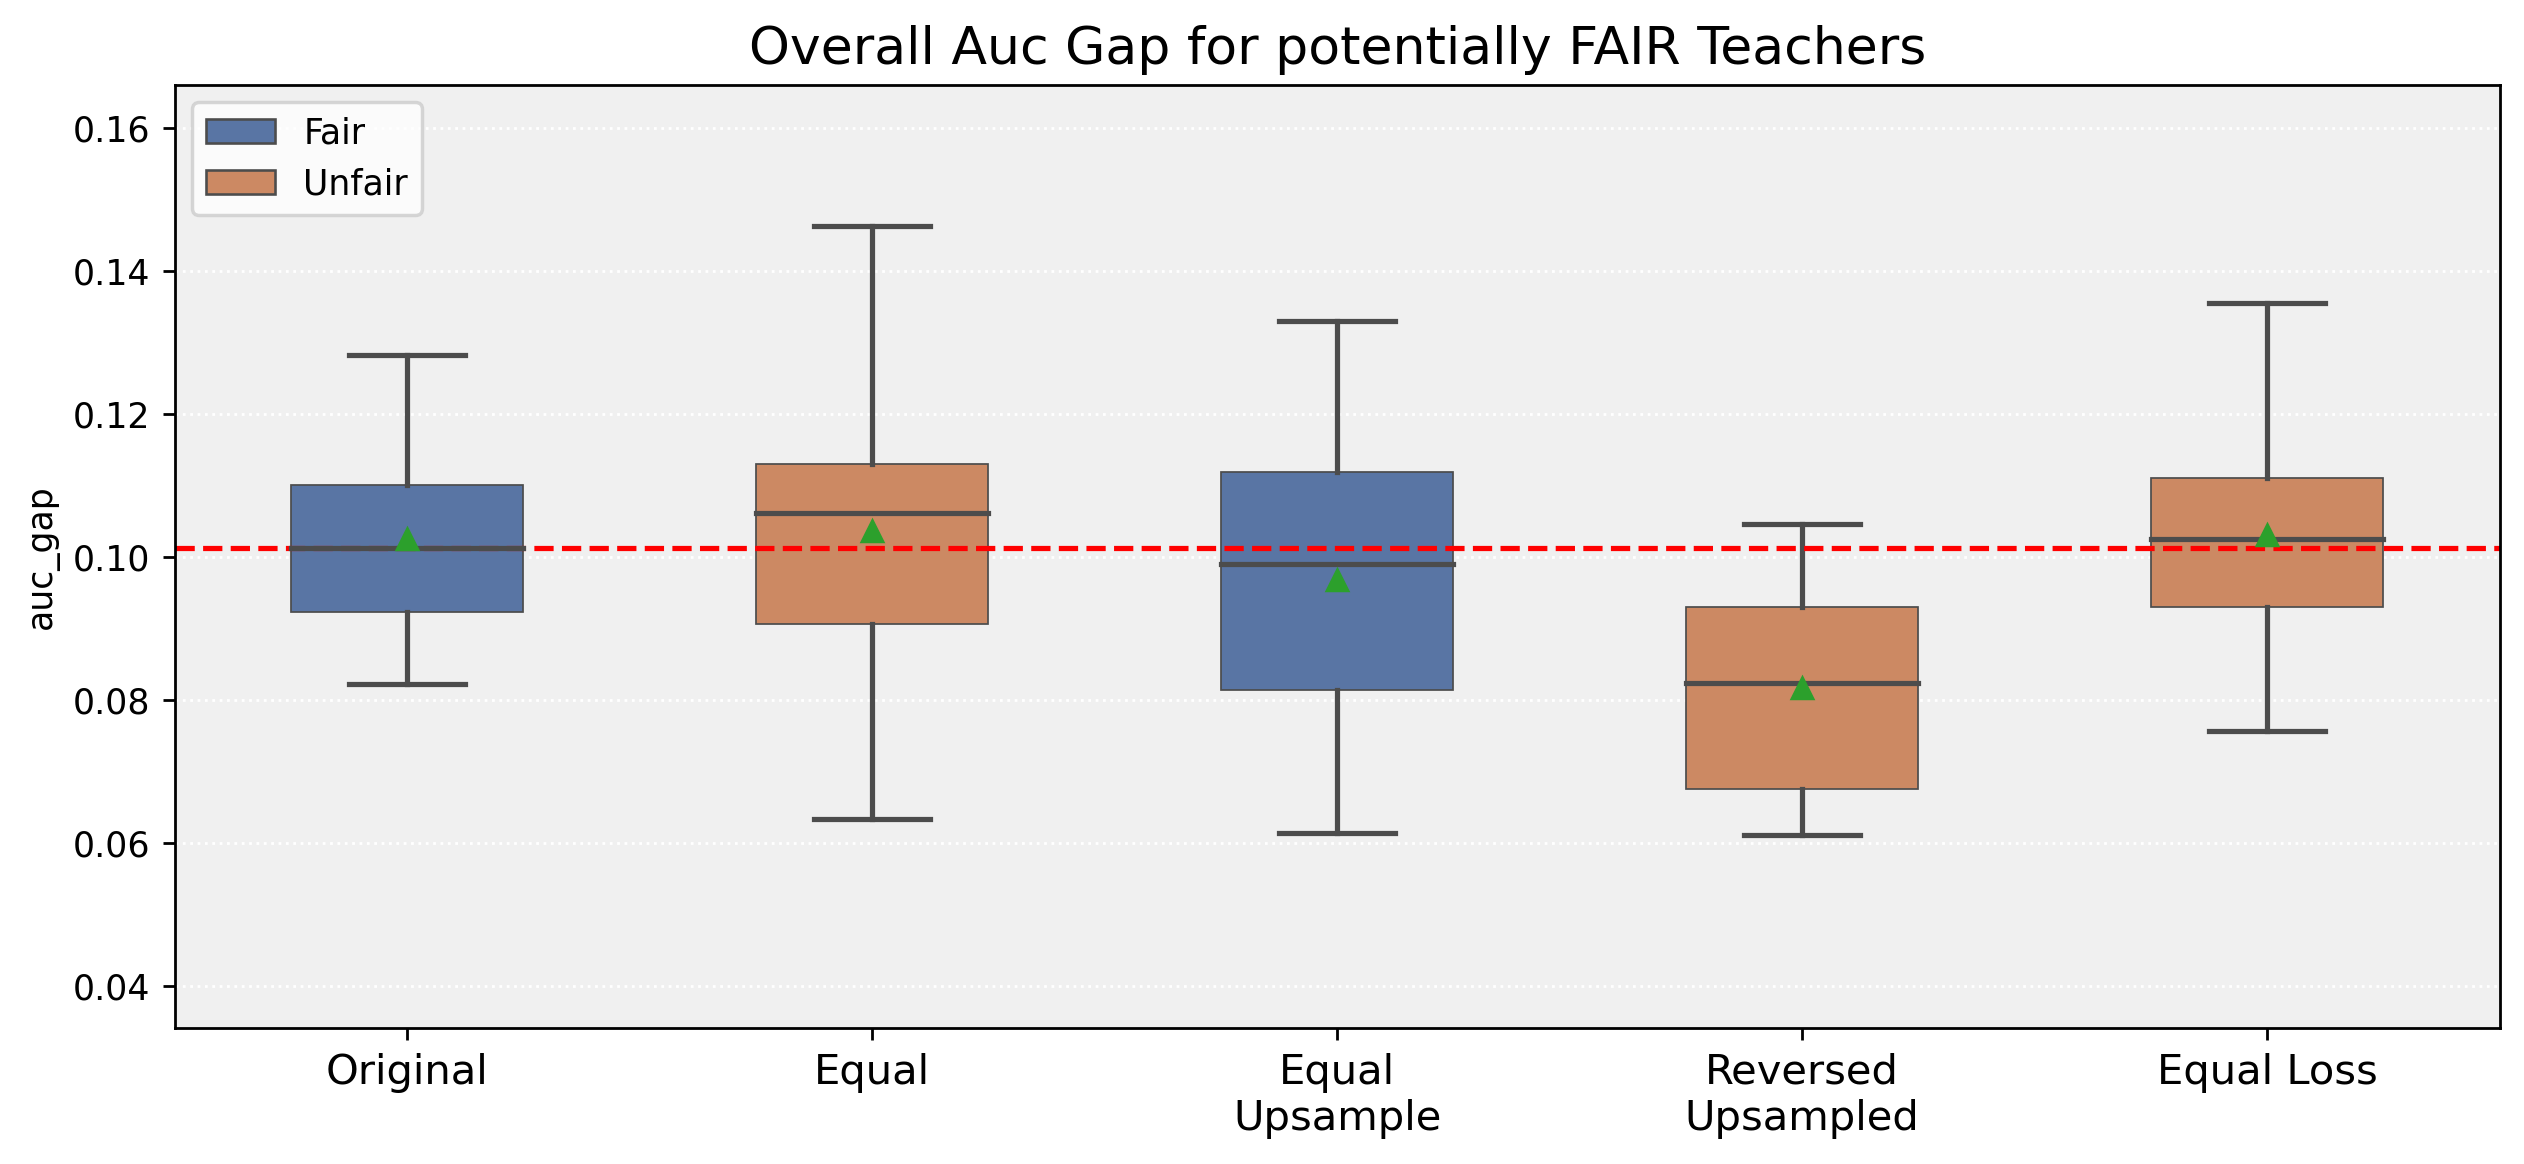

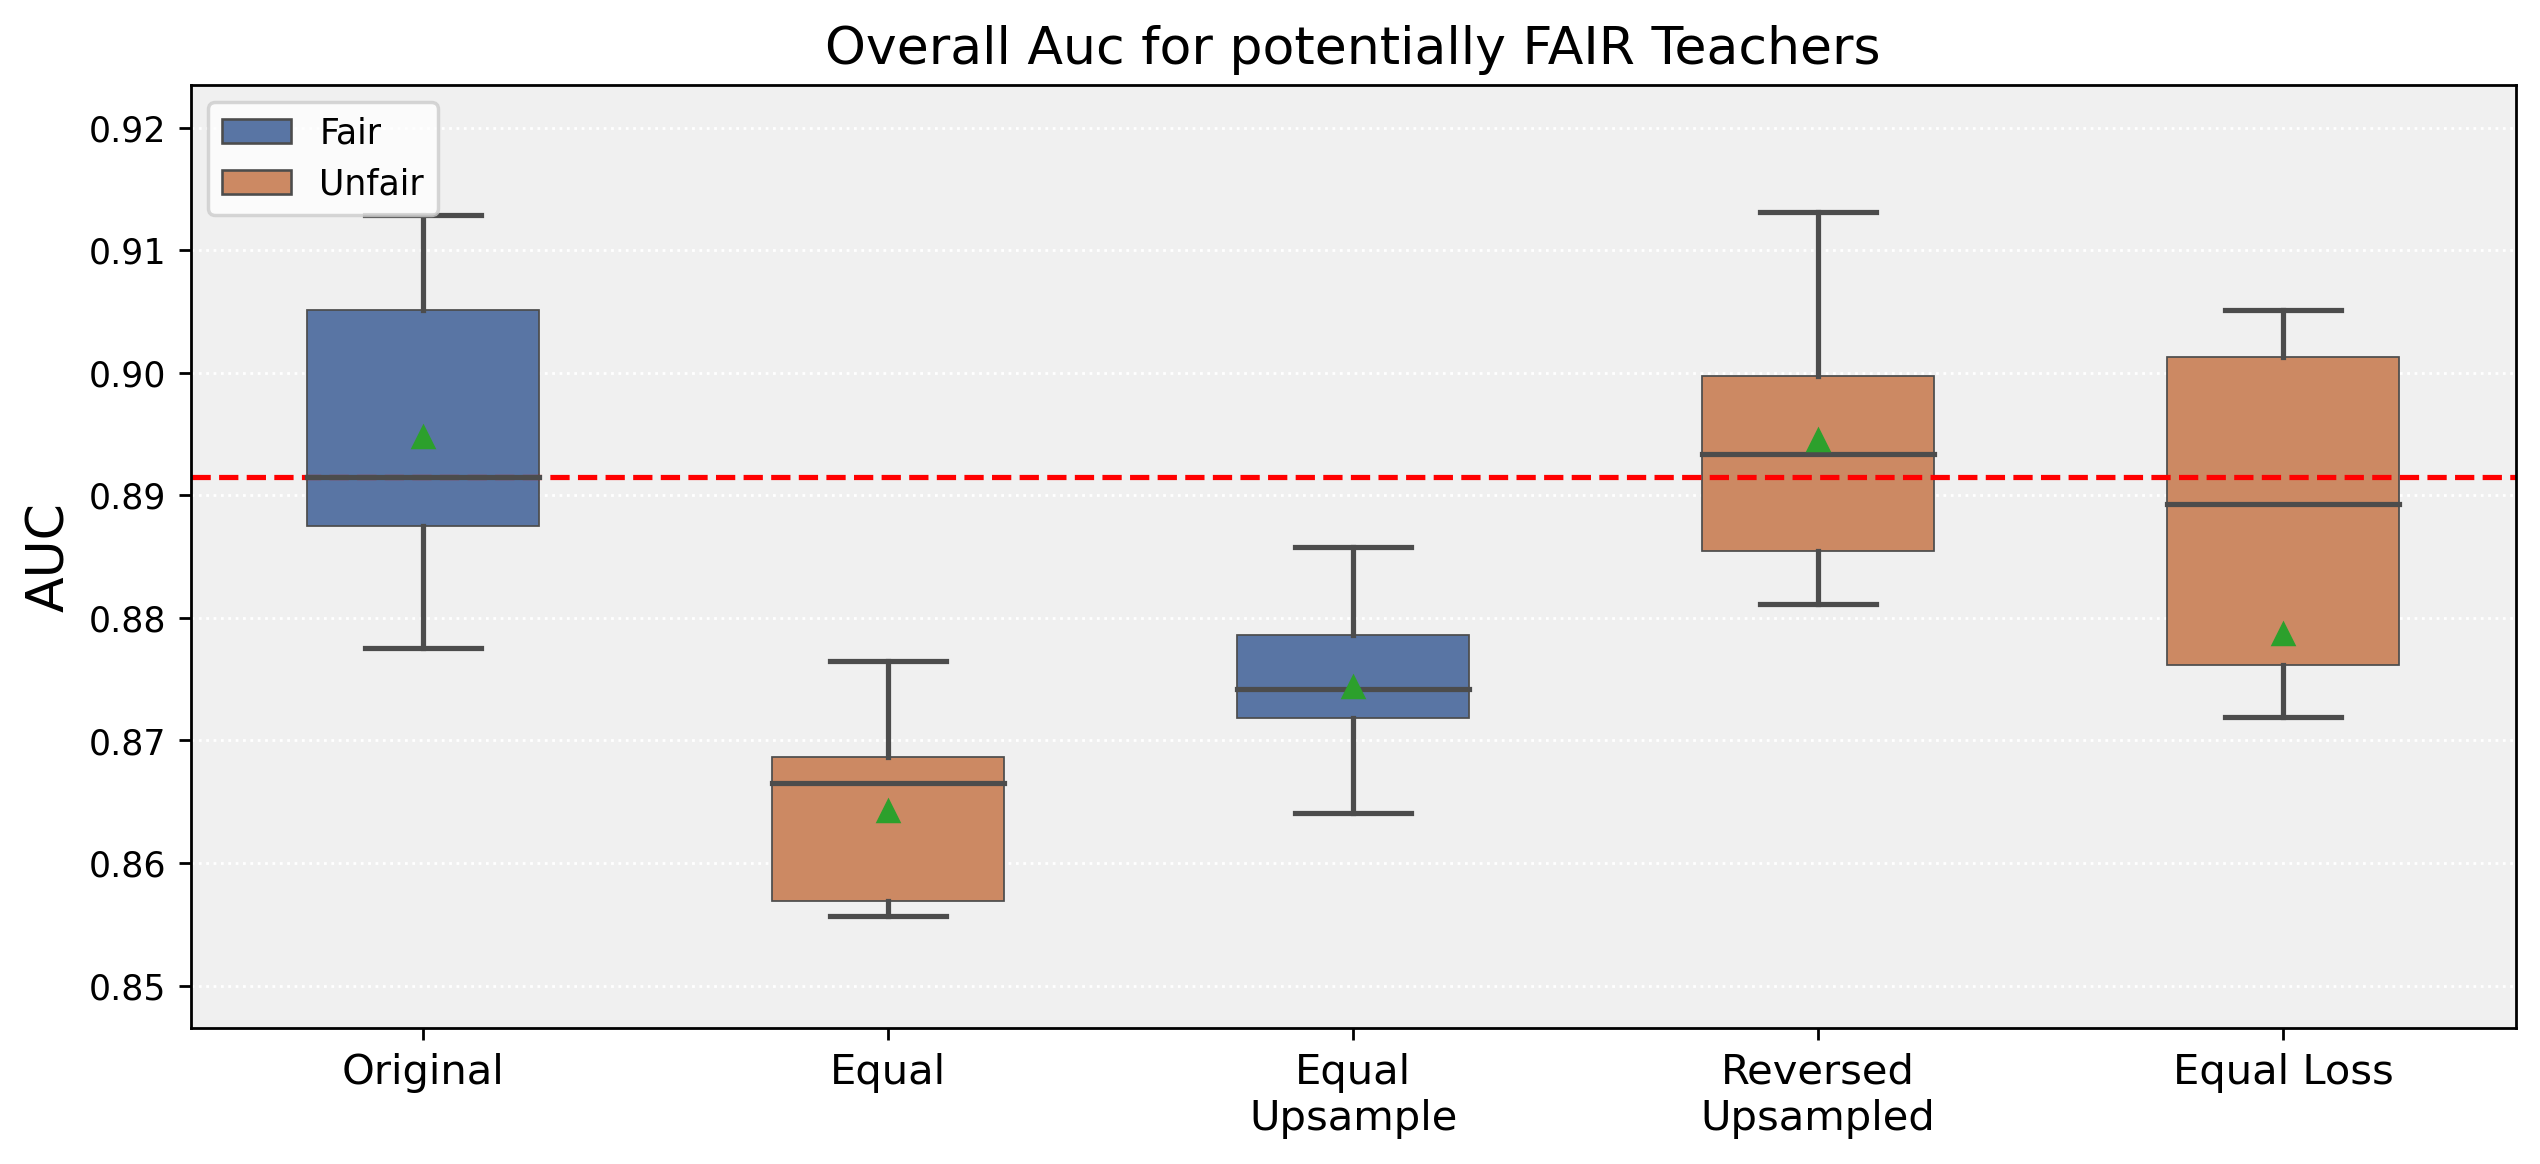

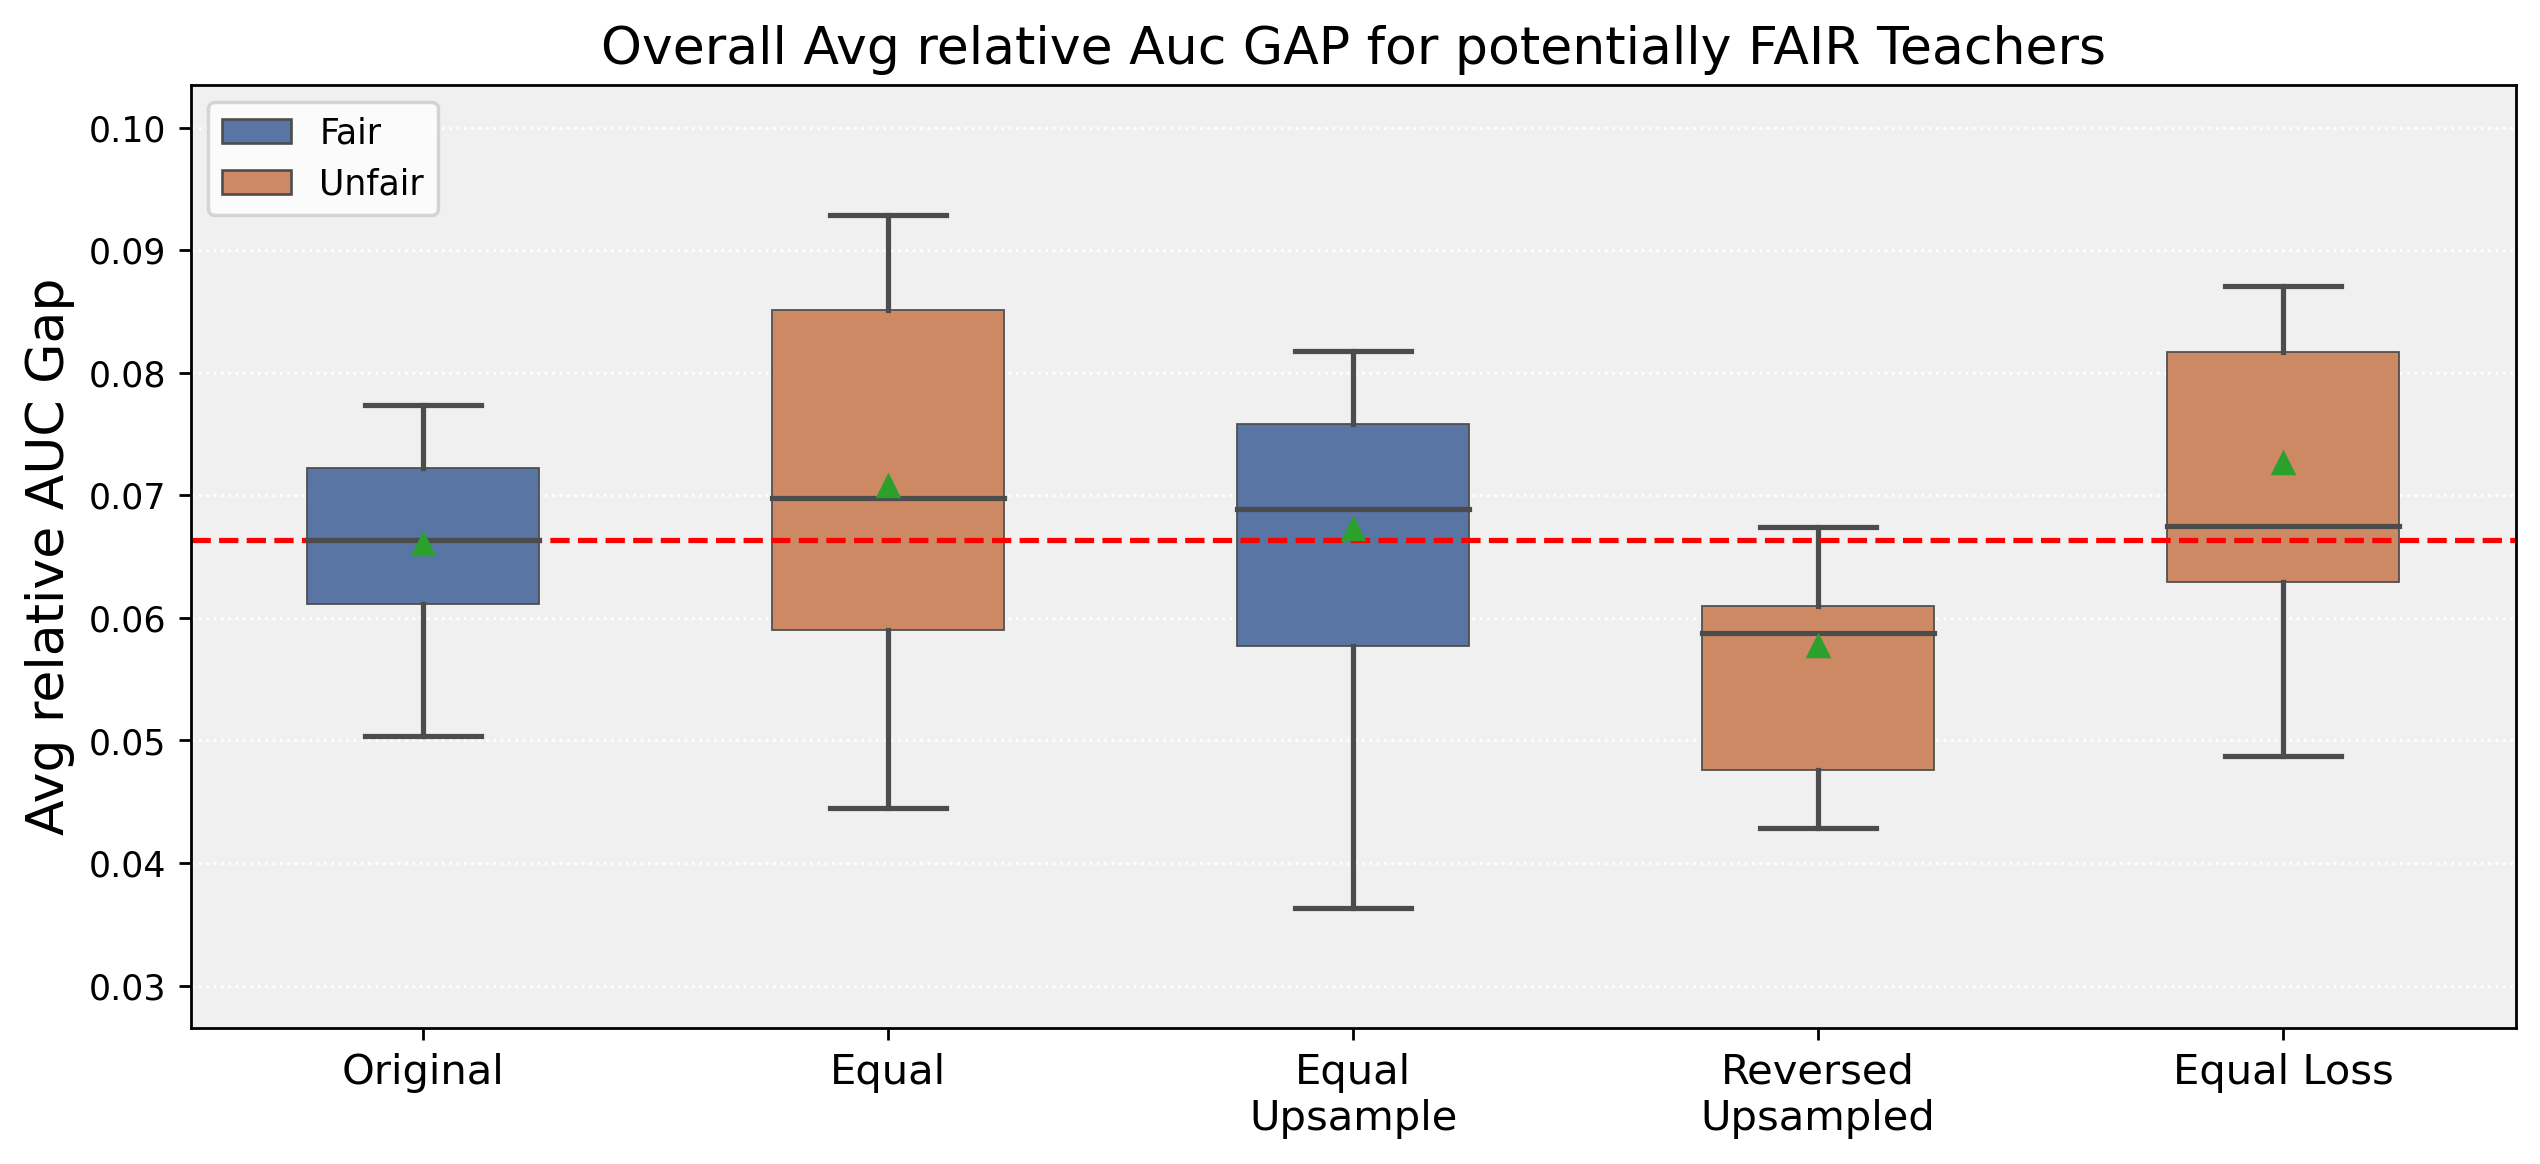

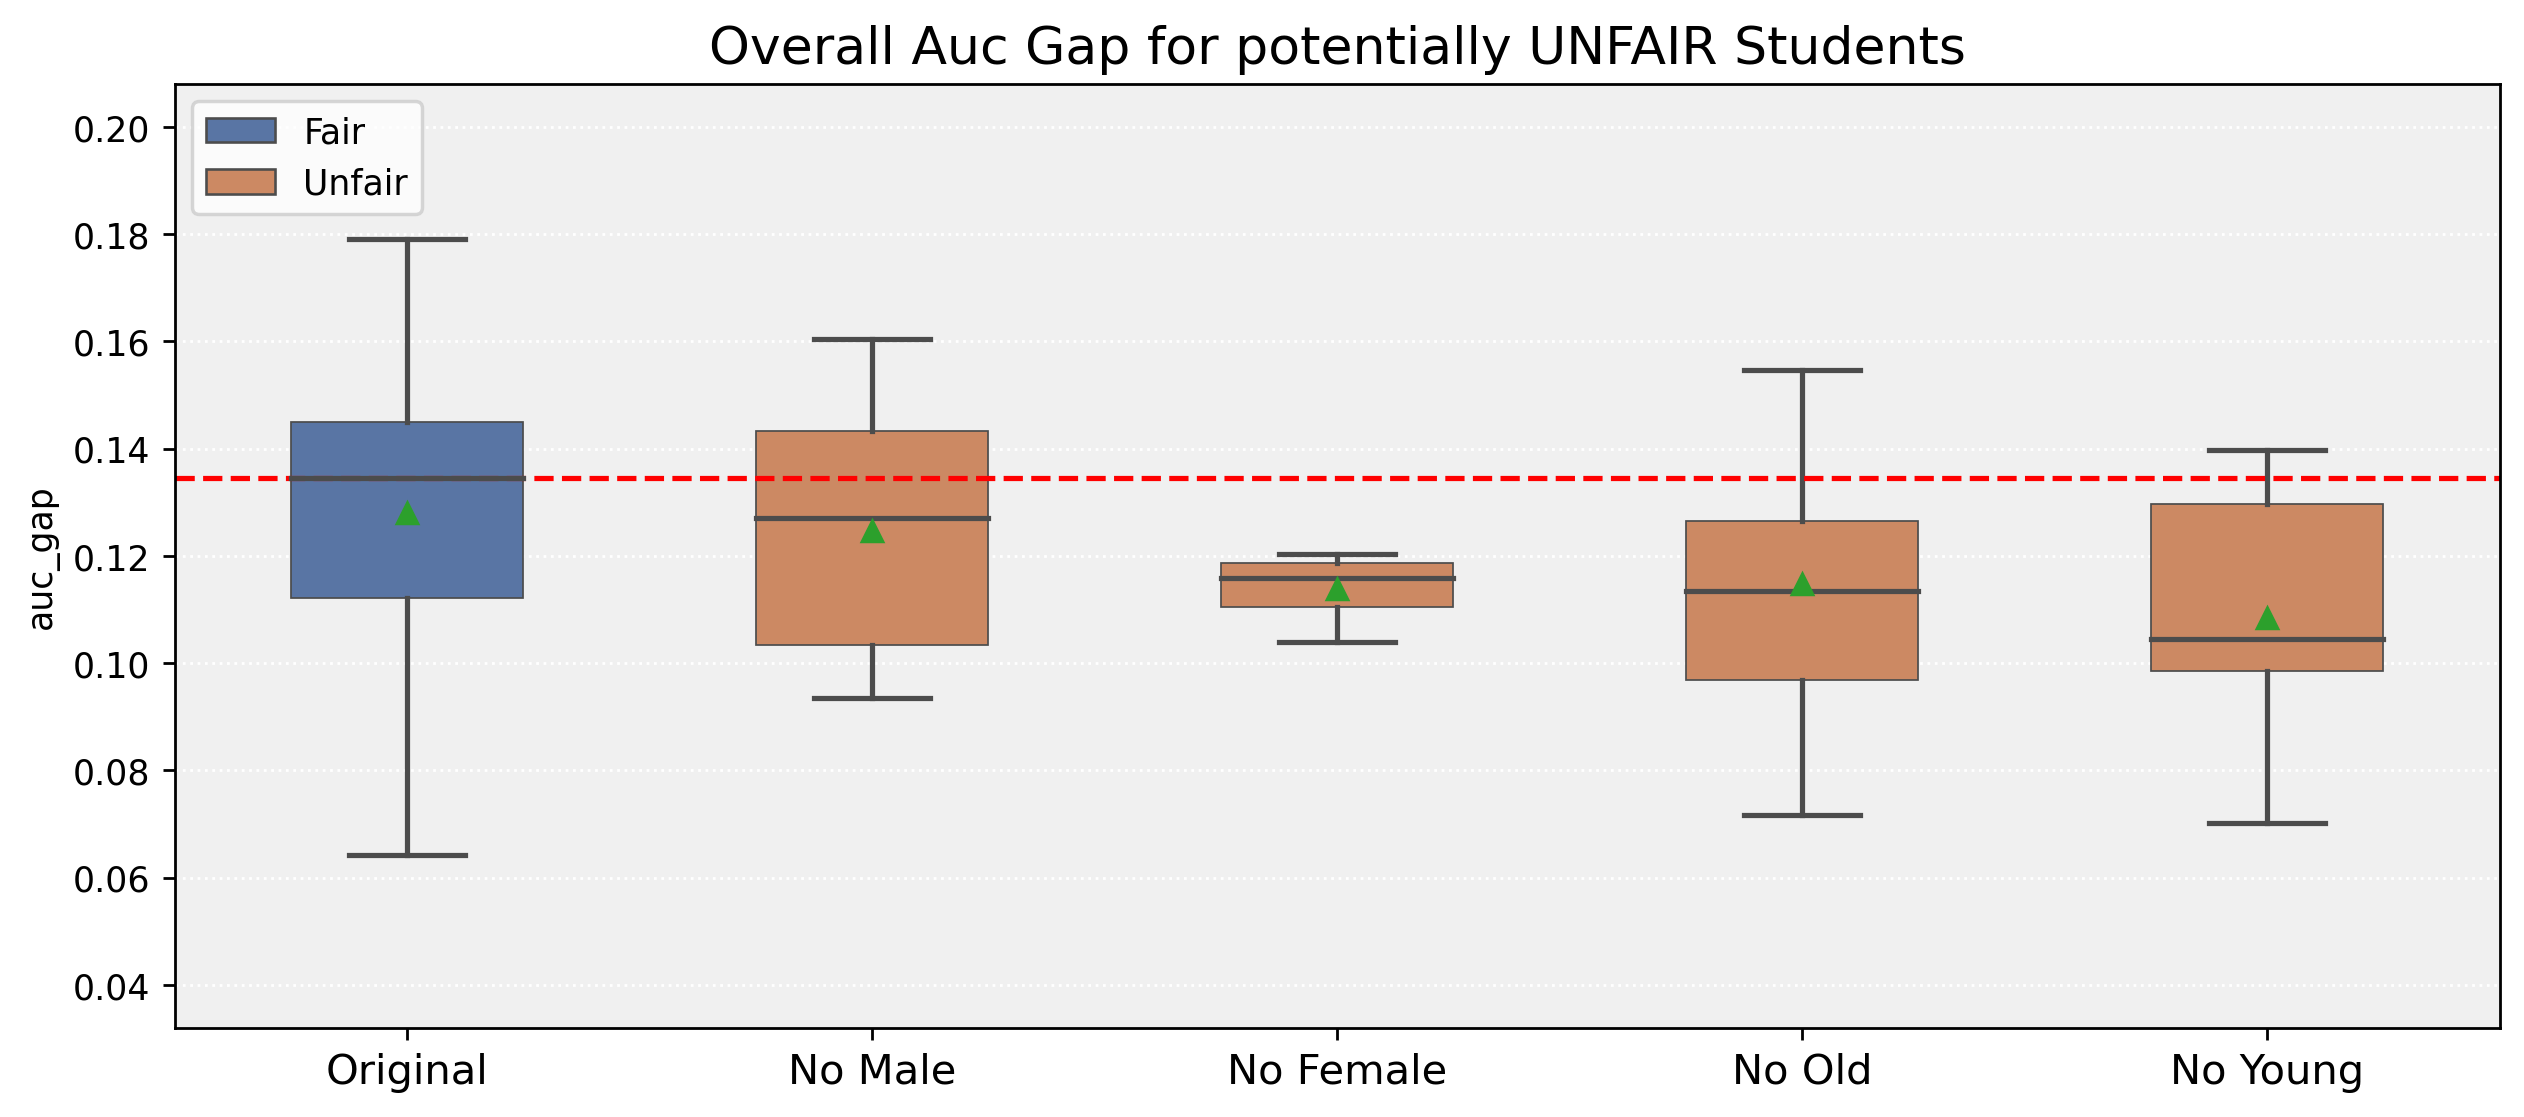

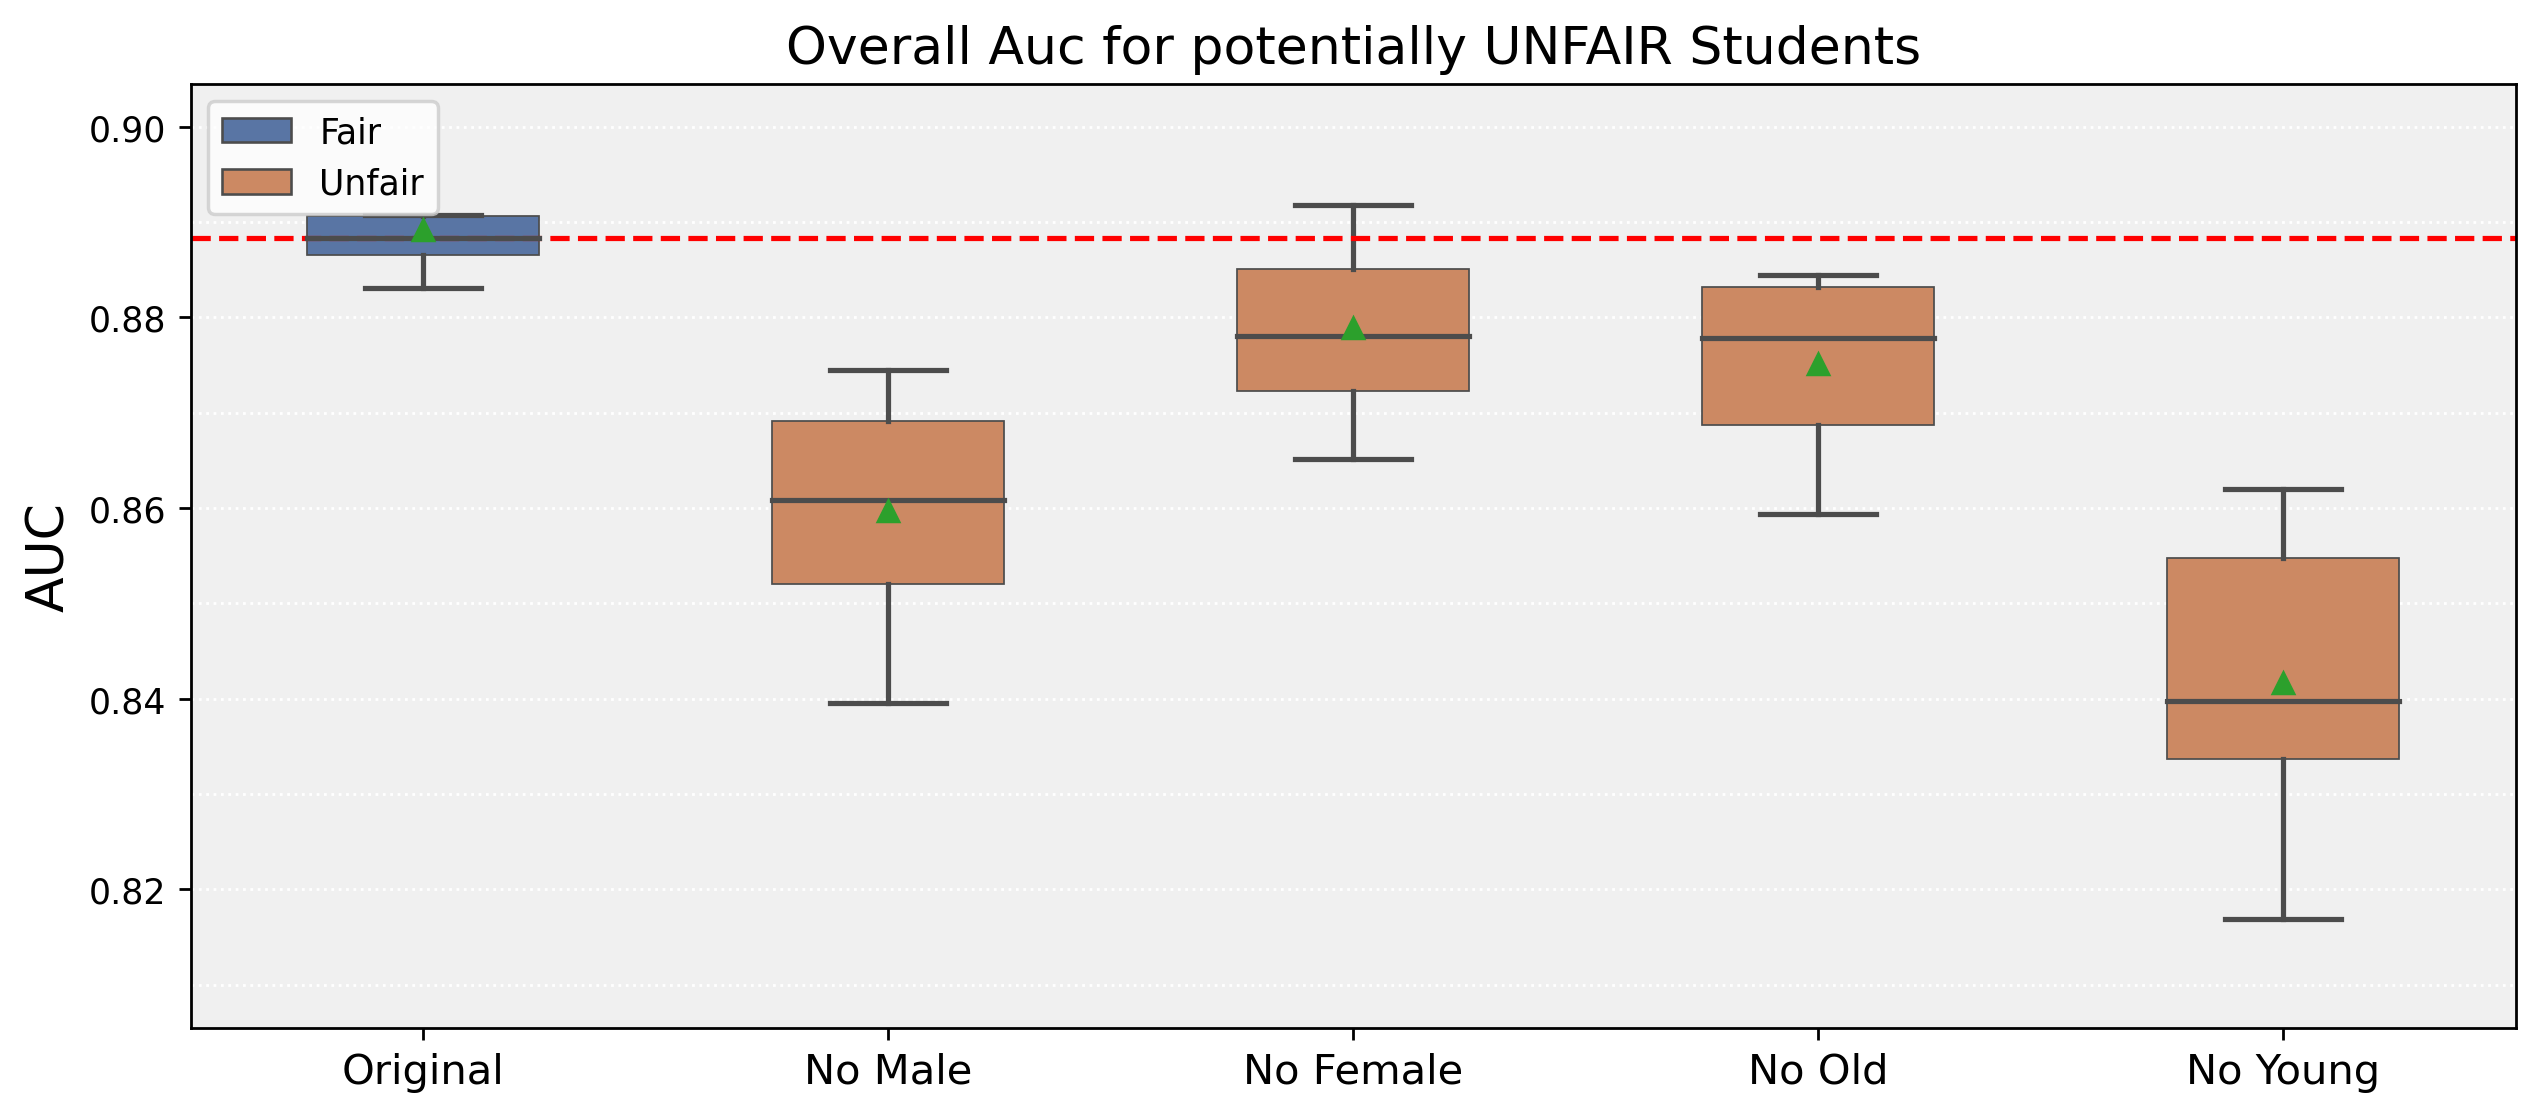

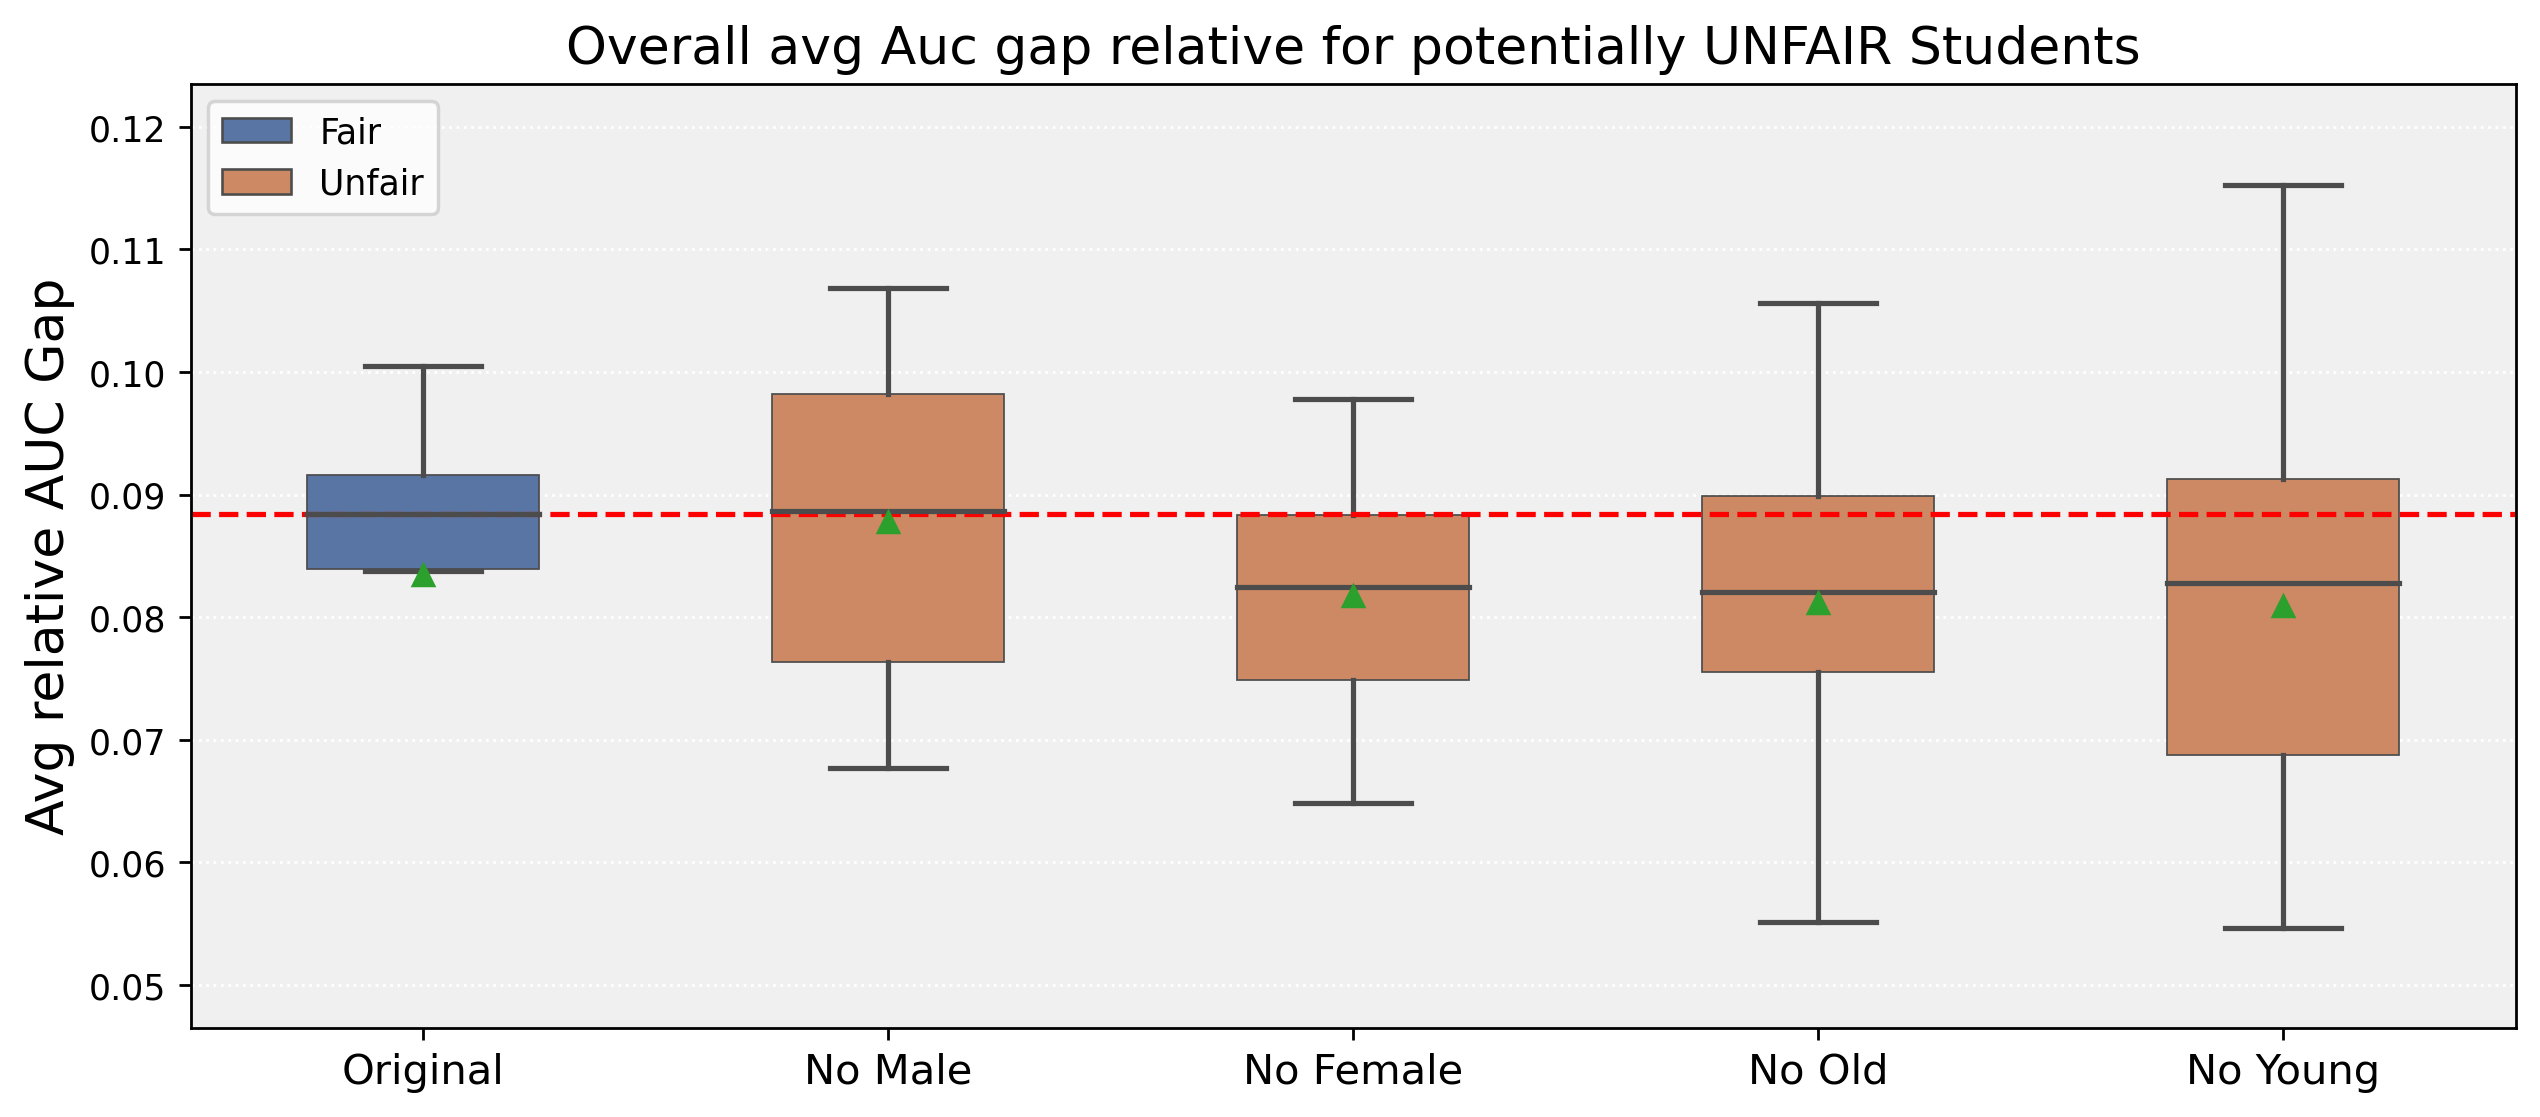

In [91]:
plt.rcParams['figure.dpi'] = 250

fair_loss_df['auc_gap_relative'] = (fair_loss_df['auc_gap'] / fair_loss_df['auc']) * 100
fair_loss_df['age_auc_gap'] = abs(fair_loss_df['age_auc_group_0'] - fair_loss_df['age_auc_group_1'])
fair_loss_df['sex_auc_gap'] = abs(fair_loss_df['sex_auc_group_0'] - fair_loss_df['sex_auc_group_1'])
fair_loss_df['avg_auc_gap'] = (fair_loss_df['age_auc_gap'] + fair_loss_df['sex_auc_gap']) / 2
fair_loss_df['avg_auc_gap_relative'] = fair_loss_df['avg_auc_gap'] / fair_loss_df['auc']

original_df['avg_auc_gap_relative'] = original_df['avg_auc_gap'] / original_df['auc']


tmp_list = dfs + [(fair_loss_df, 'Lagrange')]

auc_baseline = original_df[original_df['sampling_technique'] == 1]['auc'].median()
auc_gap_baseline = original_df[original_df['sampling_technique'] == 1]['auc_gap'].median()
avg_auc_gap_baseline = original_df[original_df['sampling_technique'] == 1]['avg_auc_gap_relative'].median()

for df, _ in tmp_list:
    # Create age_auc_gap, age_youden_gap ...
    df['age_auc_gap'] = abs(df['age_auc_group_0'] - df['age_auc_group_1'])
    df['sex_auc_gap'] = abs(df['sex_auc_group_0'] - df['sex_auc_group_1'])
    df['age_youden_gap'] = abs(df['age_youden_group_0'] - df['age_youden_group_1'])
    df['sex_youden_gap'] = abs(df['sex_youden_group_0'] - df['sex_youden_group_1'])

# TODO:
# Maybe put overall performance as well for subgroup?

#### ALL
# all_data_box_plot(tmp_list, 'auc_gap', baseline=auc_gap_baseline, title='Overall Auc Gap for different training techniques')
# all_data_box_plot(tmp_list, 'auc', baseline=auc_baseline, title='Overall Auc for different training techniques')
# subgroup_box_plot(tmp_list, 'auc_gap', baseline=auc_gap_baseline, title='Auc Gap subgroup performance for different training techniques')
# subgroup_box_plot(tmp_list, 'auc', baseline=auc_baseline, title='Auc subgroup performance for different training techniques')
all_data_box_plot(tmp_list, 'auc_gap_relative', baseline=auc_gap_baseline, title='HAM10000: Overall AUC Gap for different training techniques')
all_data_box_plot(tmp_list, 'auc', baseline=auc_baseline, title='HAM10000: Overall AUC for different training techniques')
all_data_box_plot(tmp_list, 'avg_auc_gap_relative', baseline=avg_auc_gap_baseline, title='HAM10000: Overall Avg Relative AUC Gap for different training techniques')


#### TEACHERS
fair_teachers_df_list = [(original_df, 'Original'), (equal_df, 'Equal'), (equal_upsample_df, 'Equal\nUpsample'), (upsample_df, 'Reversed\nUpsampled'), (fair_loss_df, 'Equal Loss')]
all_data_box_plot(fair_teachers_df_list, 'auc_gap', baseline=auc_gap_baseline, mode='teacher', title='Overall Auc Gap for potentially FAIR Teachers')
all_data_box_plot(fair_teachers_df_list, 'auc', baseline=auc_baseline, mode='teacher', title='Overall Auc for potentially FAIR Teachers')
all_data_box_plot(fair_teachers_df_list, 'avg_auc_gap_relative', baseline=avg_auc_gap_baseline, mode='teacher', title='Overall Avg relative Auc GAP for potentially FAIR Teachers')
# subgroup_box_plot(fair_teachers_df_list, 'auc_gap', baseline=auc_gap_baseline, mode='teacher', title='Auc Gap for subgroups in potentially FAIR Teachers')
# subgroup_box_plot(fair_teachers_df_list, 'auc', baseline=auc_baseline, mode='teacher', title='Auc for subgroups in potentially FAIR Teachers')
# subgroup_box_plot(fair_teachers_df_list, 'avg_auc_gap_relative', baseline=avg_auc_gap_baseline, mode='teacher', title='Auc for subgroups in potentially FAIR Teachers')

#### STUDENTS
unfair_students_df_list = [(original_df, 'Original'), (no_male_df, 'No Male'), (no_female_df, 'No Female'), (no_old_df, 'No Old'), (no_young_df, 'No Young')]
all_data_box_plot(unfair_students_df_list, 'auc_gap', baseline=auc_gap_baseline, mode='student', title='Overall Auc Gap for potentially UNFAIR Students')
all_data_box_plot(unfair_students_df_list, 'auc', baseline=auc_baseline, mode='student', title='Overall Auc for potentially UNFAIR Students')
all_data_box_plot(unfair_students_df_list, 'avg_auc_gap_relative', baseline=avg_auc_gap_baseline, mode='student', title='Overall avg Auc gap relative for potentially UNFAIR Students')
# subgroup_box_plot(unfair_students_df_list, 'auc_gap', baseline=auc_gap_baseline, mode='student', title='Auc Gap for subgroups in potentially UNFAIR Students')
# subgroup_box_plot(unfair_students_df_list, 'auc', baseline=auc_baseline, mode='student', title='Auc for subgroups in potentially UNFAIR Students')

In [82]:

def subgroup_box_plot(
    df_tuples,
    metric: str,
    title: str = 'ResNet models performance per sampling technique for HAM10k',
    baseline: Optional[float] = None,
    mode: Optional[Literal['all', 'teacher', 'student']] = 'all'
):
    
    plt.figure(figsize=(25, 10))
    dfs = []
    for tuple in df_tuples:
        df, df_name = tuple

        df['model_name'] = pd.Categorical(df['model_name'], ["resnet18", "resnet34", "resnet50", "resnet101"])
        df = df.sort_values("model_name")
        df['data'] = df_name

        if mode == 'student':
            df = df[df['model_name'].isin(['resnet18', 'resnet34'])]
        
        if mode == 'teacher':
            df = df[df['model_name'].isin(['resnet50', 'resnet101'])]

        if df_name == 'Original':
            baseline = df[metric].median()

        # Create columns 'Group' and 'Metric' that 'melt' the metric groups into long format
        if 'gap' in metric:
            df_melt = df.melt(
                id_vars=['model_name', 'data'], 
                value_vars=[f'age_{metric}', f'sex_{metric}'],
                var_name='Group', value_name='Metric'
            )
        else:
            df_melt = df.melt(
                id_vars=['model_name', 'data'], 
                value_vars=[f'age_{metric}_group_0', f'age_{metric}_group_1', f'sex_{metric}_group_0', f'sex_{metric}_group_1'],
                var_name='Group', value_name='Metric'
            )

        df_melt['data'] = df_name

        dfs.append(df_melt)

    df = pd.concat(dfs)

    # plot barplot with 'Group' as hue
    sns.boxplot(
        x="data", 
        y="Metric", 
        hue="Group", 
        data=df, 
        palette="deep", 
        linewidth=1.5, 
        boxprops=dict(linewidth=0.5), 
        showfliers=False,
        width=0.6, 
        dodge=True 

    )
    

    if baseline:
        plt.axhline(y=baseline, color='r', linestyle='--')
    plt.legend(loc='upper left', frameon=True, fontsize=20)

    handles, labels = plt.gca().get_legend_handles_labels()
    legend_names = get_subgroup_names(metric)
    for i, label in enumerate(labels):
        if label in legend_names:
            labels[i] = legend_names[label]

    # Put the legend outside
    # plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
    plt.legend(handles, labels, loc='upper left', frameon=True, fontsize=20)

    plt.title(title, fontsize=20)
    # plt.xlabel('Training Technique', fontsize=20)

    if metric == 'auc':
        plt.ylabel('AUC', fontsize=20)
    if metric == 'avg_auc_gap_relative':
        plt.ylabel('Avg relative AUC Gap', fontsize=20)

    plt.xticks(fontsize=15)  # Set font size for x ticks
    plt.yticks(fontsize=15)

    plt.show()


## Table - All data

In [20]:
data = []
column_order = ['Original', 'No Male', 'No Female', 'No Old', 'No Young', 'Equal', 'Equal\nUpsample', 'Equal\nUpsample 2', 'Upsample\nReversed', 'Equal Loss']

tmp_df_tuples = dfs.copy()
tmp_df_tuples.append((fair_loss_df, 'Equal Loss'))

for df, df_name in tmp_df_tuples:
    # if df_name == 'Original':
    #     df = df[df['model_id'] == 'r34-sam1-s46']
    print(df_name)
    # df = df[['model_name', 'model_id', 'seed', 'auc', 'youden', 'TPR', 'auc_gap', 'age_tpr_diff', 'sex_tpr_diff', 'age_eq_odds', 'sex_eq_odds']]
    df['data'] = df_name
    data.append(df)

all_data = pd.concat(data)

# all_data = all_data[all_data['model_name'].isin(['resnet18', 'resnet34'])]

# Calculate TPR_gap
all_data['TPR_gap'] = np.maximum(all_data['age_tpr_diff'], all_data['sex_tpr_diff'])
all_data['TPR_gap_avg'] = all_data[['age_tpr_diff', 'sex_tpr_diff']].mean(axis=1)
all_data['Eq_odds_max'] = np.maximum(all_data['age_eq_odds'], all_data['sex_eq_odds'])
all_data['Eq_odds_avg'] = all_data[['age_eq_odds', 'sex_eq_odds']].mean(axis=1)
# all_data = all_data[['data', 'model_name', 'auc', 'youden', 'TPR', 'auc_gap', 'TPR_gap', 'TPR_gap_avg', 'Eq_odds_max', 'Eq_odds_avg']]



all_data = all_data[['data', 'model_name', 'auc', 'youden', 'TPR', 'auc_gap', 'auc_gap_relative', 'TPR_gap', 'Eq_odds_max']]

mean_data = all_data.groupby(['data']).mean()
mean_data = mean_data.reset_index()
mean_data = mean_data.sort_values(by='data', key=lambda x: x.map({k: i for i, k in enumerate(column_order)}))
display(mean_data)

median_data = all_data.groupby(['data']).median()
median_data = median_data.reset_index()
median_data = median_data.sort_values(by='data', key=lambda x: x.map({k: i for i, k in enumerate(column_order)}))
display(median_data)

std_data = all_data.groupby(['data']).std()
std_data = std_data.reset_index()
std_data = std_data.sort_values(by='data', key=lambda x: x.map({k: i for i, k in enumerate(column_order)}))
display(std_data)

Original
No Male
No Female
No Old
No Young
Equal
Equal
Upsample
Equal
Upsample 2
Upsample
Reversed
Equal Loss


/tmp/ipykernel_1805102/595844863.py:30: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



data       auc    youden       TPR   auc_gap  \
8            Original  0.907423  0.540737  0.638298  0.093707   
5             No Male  0.859669  0.395611  0.468085  0.124682   
4           No Female  0.878888  0.423810  0.500000  0.113894   
6              No Old  0.875167  0.437957  0.512057  0.114678   
7            No Young  0.841700  0.419495  0.539007  0.108386   
0               Equal  0.841290  0.380164  0.468085  0.115057   
1     Equal\nUpsample  0.884150  0.517231  0.629078  0.118056   
2   Equal\nUpsample 2  0.892743  0.494156  0.564539  0.135454   
9  Upsample\nReversed  0.899824  0.470425  0.529078  0.105091   
3          Equal Loss  0.859559  0.475896  0.629787  0.146871   

   auc_gap_relative   TPR_gap  Eq_odds_max  
8         10.326733  0.104427     0.118587  
5         14.517533  0.096980     0.118353  
4         12.962521  0.063032     0.113355  
6         13.097312  0.094474     0.138339  
7         12.865459  0.071241     0.089453  
0         13.698097  0.078695     0.113259  
1         13.356694  0.073152     0.152999  
2         15.185153  0.069421     0.120060  
9         11.691531  0.071208     0.103499  
3               NaN  0.089485     0.194926

/tmp/ipykernel_1805102/595844863.py:35: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



data       auc    youden       TPR   auc_gap  \
8            Original  0.907423  0.540737  0.638298  0.093707   
5             No Male  0.860804  0.394334  0.457447  0.127116   
4           No Female  0.878080  0.416710  0.485816  0.115851   
6              No Old  0.877896  0.438629  0.510638  0.113501   
7            No Young  0.839771  0.427113  0.542553  0.104474   
0               Equal  0.838201  0.366274  0.457447  0.115491   
1     Equal\nUpsample  0.882423  0.508488  0.624113  0.117379   
2   Equal\nUpsample 2  0.891718  0.494082  0.556738  0.136356   
9  Upsample\nReversed  0.901718  0.464885  0.521277  0.104489   
3          Equal Loss  0.881302  0.510045  0.652482  0.147977   

   auc_gap_relative   TPR_gap  Eq_odds_max  
8         10.326733  0.104427     0.118587  
5         14.940412  0.109943     0.114689  
4         13.035998  0.064286     0.107459  
6         13.008182  0.078068     0.120547  
7         12.251966  0.061488     0.083793  
0         13.778315  0.076083     0.109970  
1         13.380795  0.065697     0.146009  
2         15.264127  0.067607     0.124308  
9         11.554287  0.060433     0.095458  
3               NaN  0.071127     0.193961

/tmp/ipykernel_1805102/595844863.py:40: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



data       auc    youden       TPR   auc_gap  \
8            Original       NaN       NaN       NaN       NaN   
5             No Male  0.012386  0.057126  0.071393  0.023299   
4           No Female  0.009352  0.050184  0.056861  0.006052   
6              No Old  0.009197  0.025693  0.029299  0.025925   
7            No Young  0.015174  0.050008  0.059993  0.023094   
0               Equal  0.016098  0.042715  0.049022  0.022612   
1     Equal\nUpsample  0.009405  0.035341  0.036935  0.018970   
2   Equal\nUpsample 2  0.008120  0.035813  0.039303  0.021055   
9  Upsample\nReversed  0.008942  0.030175  0.035571  0.018315   
3          Equal Loss  0.049932  0.102482  0.081195  0.022818   

   auc_gap_relative   TPR_gap  Eq_odds_max  
8               NaN       NaN          NaN  
5          2.773047  0.028044     0.019521  
4          0.749175  0.031720     0.030577  
6          2.941640  0.075051     0.058269  
7          2.696902  0.044563     0.033952  
0          2.773999  0.028238     0.016113  
1          2.177925  0.034663     0.025224  
2          2.433926  0.027385     0.016521  
9          2.111032  0.049528     0.035448  
3               NaN  0.046287     0.034435